# Project 1: SAT & ACT Analysis

## Problem Statement

I will be cleaning and analysing data from SAT and ACT across 2017 and 2018, in order to draw statistical inferences and insights. Along with external research, I will then, ultimately, proceed to make recommendations to the College Board about which chosen state to focus on to increase participation rate, so that money can be efficiently spent.

## Executive Summary


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [2]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code:
sat2017 = '../data/sat_2017.csv'
act2017 = '../data/act_2017.csv'

import pandas as pd
sat2017 = pd.read_csv(sat2017)
act2017 = pd.read_csv(act2017)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [7]:
act2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Answer: Both datasets differ by 1 entry, with act2017 having 1 more entry than the other - it includes an additional "National" row at the top, whereas sat2017 starts with a state's average straight away.

#### 4a. Does the data look complete? 

Answer: Yes they do; the number of states in the USA is 50, and the subjects that are tested in either ACT or SAT are all present in both datasets.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

SAT range: 400 - 1600

ACT range: 1 - 36

Comparing the datasets with their respective sources, these differences have been identified:

1) For sat2017.csv vs source,

- source has an additional "National Average" at the bottom
- both datasets differ in the value for Maryland, Math. sat2017.csv's value for that entry is merely 52, as compared to a value of 524 in the source

2) For act2017.csv vs source,

- the value for Wyoming, Composite differs; the former shows a value of 20.2x while the latter shows a value of 20.2
- the value for Maryland, Science differs as well; the former shows a value of 2.3 while the latter shows a value of 23.3

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
# the difference in values for sat2017/act2017 against their respective sources seem like typo errors, so will proceed to amend these entries first
#code
sat2017['Math'] = sat2017['Math'].replace(52, 524)
act2017['Composite'] = act2017['Composite'].replace('20.2x', 20.2)
act2017.loc[21, 'Science'] = 23.3

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
#code
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 'Composite' and 'Participation' datatypes should not be object - they should be either an integer or a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#code
def float_participation(x):
    if type(x) == str:
        y = float(x.replace("%", ""))
        return y/100

In [12]:
sat2017['Participation'] = sat2017['Participation'].apply(float_participation)

In [13]:
act2017['Participation'] = act2017['Participation'].apply(float_participation)

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
#code
def float_composite(x):
    return float(x)

act2017['Composite'] = act2017['Composite'].apply(float_composite)  ### could have used a lambda function 
                                                                    ### .apply(lambda x : float(x))

In [ ]:
### There are also inbuilt functions for this sort of thing
### act2017['Composite'] = act2017['Composite'].astype(....)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
#code
sat2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [16]:
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [17]:
#Code:
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [18]:
act2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [19]:
#code
sat2017 = sat2017.rename(columns={"State": "state",
                        "Participation": "sat_participation_rate",
                        "Evidence-Based Reading and Writing": "sat_evidence-based_reading_and_writing",
                        "Math": "sat_math",
                        "Total": "sat_total_score"
                       })                          ### or use sat2017.columns = ['state','sat_participation_rate',...]
sat2017.head() 

,state,sat_participation_rate,sat_evidence-based_reading_and_writing,sat_math,sat_total_score
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [20]:
#code
act2017 = act2017.rename(columns={"State": "state",
                        "Participation": "act_participation_rate",
                        "English": "act_english",
                        "Reading": "act_reading",
                        "Science": "act_science",
                        "Math": "act_math",
                        "Composite": "act_composite_score"
                       })
act2017.head()

,state,act_participation_rate,act_english,act_math,act_reading,act_science,act_composite_score
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset(s)|Description|
|---|---|---|---| 
|**state**|*string*|SAT 2017 & ACT 2017|A participating American state in 2017|
|**(sat OR act)_participation_rate**|*float*|SAT 2017 & ACT 2017|Proportion of eligible American students from the particular state in 2017 that took the test in question (either SAT or ACT)|
|**(sat OR act)_evidence-based_reading_and_writing**|*integer*|SAT 2017|Average Score of participating students for Evidence-based Reading and Writing|
|**(sat OR act)_math**|*integer*|SAT 2017 & ACT 2017|Average Score of participating students for Mathematics Test|
|**act_english**|*integer*|ACT 2017|Average Score of participating students for English Test|
|**act_reading**|*integer*|ACT 2017|Average Score of participating students for Reading Test|
|**act_science**|*integer*|ACT 2017|Average Score of participating students for Science Test|
|**sat_total_score**|*integer*|SAT 2017|Sum of the 2 SAT test scores|
|**act_composite_score**|*float*|ACT 2017|Average of the 4 ACT test scores|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [21]:
#code
act2017 = act2017.drop([0])
act2017.head()

,state,act_participation_rate,act_english,act_math,act_reading,act_science,act_composite_score
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [22]:
#Code:
sat2017.set_index('state')
act2017.set_index('state')

combined2017 = pd.merge(left=sat2017, right=act2017, on='state', how='left')
combined2017.head()

,state,sat_participation_rate,sat_evidence-based_reading_and_writing,sat_math,sat_total_score,act_participation_rate,act_english,act_math,act_reading,act_science,act_composite_score
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
#code
combined2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [24]:
# load and read 2018 datasets
# then proceed to compare each dataset
sat2018 = '../data/sat_2018.csv'
act2018 = '../data/act_2018.csv'
act2018_updated = '../data/act_2018_updated.csv'

sat2018 = pd.read_csv(sat2018)
act2018 = pd.read_csv(act2018)
act2018_updated = pd.read_csv(act2018_updated)

In [25]:
sat2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567,550,1117
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3%,633,625,1257


In [26]:
act2018.tail()

,State,Participation,Composite
47,Virginia,24%,23.9
48,Washington,24%,22.2
49,West Virginia,65%,20.3
50,Wisconsin,100%,20.5
51,Wyoming,100%,20.0


In [27]:
act2018_updated.tail()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
46,Virginia,24,23.9,23.8,23.3,24.7,23.5
47,Washington,24,22.2,21.4,22.2,22.7,22.0
48,West Virginia,65,20.3,19.8,19.4,21.3,20.4
49,Wisconsin,100,20.5,19.8,20.3,20.6,20.8
50,Wyoming,100,20.0,19.0,19.7,20.6,20.3


# Comparing act2018.csv vs act2018_updated.csv:

act2018 has missing data points (all the different subject scores), and the number of entries do not match sat2018.

Hence, will be **using act2018_updated dataset** instead.

### Proceed to clean both datasets first:

1) cross-reference with source and make appropriate amendments

2) check and convert datatypes

3) rename columns

4) rearrange columns so that it follows the same ordering as act2017

Cross-referencing and comparing the 2018 SAT and ACT datasets with their respective sources, the following differences were noticed:

1) For 2018 SAT:
- the ordering for Ohio and Oklahoma (and their respective entries) is swapped in the dataset, as compared to the source
- the following table is a compilation of all the differing values:

|From:|State|Evidence-Based Reading and Writing|Math|Total|Participation|
|---|---|---|---|---|---|
|Source|Florida|522|493|1014|0.97|
|Dataset|Florida|550|549|1099|0.56|
|---|---|---|---|---|---|
|Source|Hawaii|550|549|1099|identical|
|Dataset|Hawaii|480|530|1010|identical|
|---|---|---|---|---|
|Source|Indiana|546|539|1086|0.67|
|Dataset|Indiana|542|532|1074|0.63|
|---|---|---|---|---|
|Source|Utah|618|612|1230|identical|
|Dataset|Utah|480|530|1010|identical|
|---|---|---|---|---|
|Source|South Dakota|identical|identical|1241|identical|
|Dataset|South Dakota|identical|identical|1240|identical|

2) For 2018 ACT:
- Only the "Percentage of Students Tested" have differences between dataset and source, namely Louisiana, North Carolina, Oklahoma and Pennsylvania; these values were not given at all in the source, whereas the converse in true for the dataset.

Amend entries in sat2018:
- swap Ohio and Oklahoma ordering
- amend all dataset values that differ from source such that the former matches the letter

In [28]:
# swap Ohio and Oklahoma rows
okla, ohio = sat2018.iloc[35], sat2018.iloc[36]          ### Good

In [29]:
# assign okla to temporary variable
temp = okla.copy()

# perform the swap by assigning ohio to okla's row
sat2018.iloc[35] = ohio

# then assign temporary variable (okla's copy) to ohio's row
sat2018.iloc[36] = temp

In [30]:
# amend all of Florida's values first
sat2018.loc[9, 'Evidence-Based Reading and Writing'] = 522
sat2018.loc[9, 'Math'] = 493
sat2018.loc[9, 'Total'] = 1014
sat2018.loc[9, 'Participation'] = '97%'

In [31]:
# followed by Hawaii's values
sat2018.loc[11, 'Evidence-Based Reading and Writing'] = 550
sat2018.loc[11, 'Math'] = 549
sat2018.loc[11, 'Total'] = 1099

In [32]:
# followed by Indiana's values
sat2018.loc[14, 'Evidence-Based Reading and Writing'] = 546
sat2018.loc[14, 'Math'] = 539
sat2018.loc[14, 'Total'] = 1086
sat2018.loc[14, 'Participation'] = '67%'

In [33]:
# followed by Utah's values
sat2018.loc[44, 'Evidence-Based Reading and Writing'] = 618
sat2018.loc[44, 'Math'] = 612
sat2018.loc[44, 'Total'] = 1230

In [34]:
# lastly is the 'Total' value for South Dakota
sat2018.loc[41, 'Total'] = 1241                     ### Good effort

As for act2018_updated dataset, no amendments will be made, so the entries will be left populated, instead of being matched with source to become "empty"/NaN.

In [35]:
# check datatypes and make appropriate conversions
act2018_updated.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [36]:
sat2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [37]:
def float_participation_int(x):             
    if type(x) == int:
        y = float(x)
        return y/100

In [38]:
act2018_updated['Percentage of Students Tested'] = act2018_updated['Percentage of Students Tested'].apply(float_participation_int)
sat2018['Participation'] = sat2018['Participation'].apply(float_participation)

In [39]:
sat2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [40]:
act2018_updated.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [41]:
sat2018 = sat2018.rename(columns={"State": "state",
                        "Participation": "sat_participation_rate",
                        "Evidence-Based Reading and Writing": "sat_evidence-based_reading_and_writing",
                        "Math": "sat_math",
                        "Total": "sat_total_score"
                       })
act2018_updated = act2018_updated.rename(columns={"State": "state",
                        "Percentage of Students Tested": "act_participation_rate",
                        "Average English Score": "act_english",
                        "Average Reading Score": "act_reading",
                        "Average Science Score": "act_science",
                        "Average Math Score": "act_math",
                        "Average Composite Score": "act_composite_score"
                       })

In [42]:
sat2018.head()

,state,sat_participation_rate,sat_evidence-based_reading_and_writing,sat_math,sat_total_score
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [43]:
act2018_updated.head()

,state,act_participation_rate,act_composite_score,act_english,act_math,act_reading,act_science
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [44]:
act2018_updated = act2018_updated[['state', 'act_participation_rate', 'act_english',
       'act_math', 'act_reading', 'act_science', 'act_composite_score']]
act2018_updated.head()

,state,act_participation_rate,act_english,act_math,act_reading,act_science,act_composite_score
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [45]:
# Combine both 2018 datasets using the state in each dataframe as the key.
sat2018.set_index('state')
act2018_updated.set_index('state')

combined2018 = pd.merge(left=sat2018, right=act2018_updated, on='state', how='left')
combined2018.head()

,state,sat_participation_rate,sat_evidence-based_reading_and_writing,sat_math,sat_total_score,act_participation_rate,act_english,act_math,act_reading,act_science,act_composite_score
0,Alabama,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.60,540,536,1076,0.27,22.5,22.5,23.0,22.1,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [46]:
combined2017.set_index('state')
combined2018.set_index('state')

final_combined = pd.merge(left=combined2017, right=combined2018, on='state', how='left', suffixes=('_2017', '_2018'))
final_combined.head()

,state,sat_participation_rate_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_score_2017,act_participation_rate_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_rate_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_score_2018,act_participation_rate_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_score_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.5,22.5,23.0,22.1,22.7


In [47]:
final_combined.to_csv('final.csv')

# Combined 2017/2018 Data Dictionary:

|Feature|Type|Dataset(s)|Description|
|---|---|---|---| 
|**state**|*string*|SAT 2017, ACT 2017, SAT 2018, ACT 2017|An American state in both 2017 and 2018|
|**(sat OR act)_participation_rate_(2017 OR 2018)**|*float*|SAT 2017, ACT 2017, SAT 2018, ACT 2018|Proportion of eligible American students from the particular state in 2017 or 2018 that took the test in question (either SAT or ACT)|
|**(sat OR act)_evidence-based_reading_and_writing_(2017 OR 2018)**|*integer*|SAT 2017, ACT 2017, SAT 2018, ACT 2017|Average Score of participating students for Evidence-based Reading and Writing for either 2017 or 2018|
|**(sat OR act)_math_(2017 OR 2018)**|*integer*|SAT 2017, ACT 2017, SAT 2018, ACT 2017|Average Score of participating students for Mathematics Test for either 2017 or 2018|
|**act_english_(2017 OR 2018)**|*integer*|ACT 2017, ACT 2018|Average Score of participating students for English Test for either 2017 or 2018|
|**act_reading_(2017 OR 2018)**|*integer*|ACT 2017, ACT 2018|Average Score of participating students for Reading Test for either 2017 or 2018|
|**act_science_(2017 OR 2018)**|*integer*|ACT 2017, ACT 2018|Average Score of participating students for Science Test for either 2017 or 2018|
|**sat_total_score_(2017 OR 2018)**|*integer*|SAT 2017, SAT 2018|Sum of the 2 SAT test scores for either 2017 or 2018|
|**act_composite_score_(2017 OR 2018)**|*float*|ACT 2017, ACT 2018|Average of the 4 ACT test scores for either 2017 or 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [48]:
#Code:
final_combined.describe().transpose()        ### Good idea. Much more readable 

,count,mean,std,min,25%,50%,75%,max
sat_participation_rate_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_evidence-based_reading_and_writing_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_score_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_rate_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.452941,1.741419,18.20,19.950,21.30,23.200,24.9
act_composite_score_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [49]:
import math

def calc_sd(column_name, dataset = final_combined):
    n = dataset[column_name].count()
    mu = dataset[column_name].mean()            
    diff_squared_list = [(item-mu)**2 for item in dataset[column_name]]  ### Good
    
    std = math.sqrt((1/n)*(sum(diff_squared_list)))
        
    return std                                  ### interestingly, math.sqrt runs pretty slowly compared to just 
                                                ### simply exponentiating by 0.5. To test, try
                                                ### import timeit
                                                ### %timeit math.sqrt(100)
                                                ### replace with 100 ** 0.5 to see the difference

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [50]:
# use .dtypes to find out which column is a non-float/integer datatype, so that we can exclude this particular column in the dictionary comprehension
final_combined.dtypes

state                                           object
sat_participation_rate_2017                    float64
sat_evidence-based_reading_and_writing_2017      int64
sat_math_2017                                    int64
sat_total_score_2017                             int64
act_participation_rate_2017                    float64
act_english_2017                               float64
act_math_2017                                  float64
act_reading_2017                               float64
act_science_2017                               float64
act_composite_score_2017                       float64
sat_participation_rate_2018                    float64
sat_evidence-based_reading_and_writing_2018      int64
sat_math_2018                                    int64
sat_total_score_2018                             int64
act_participation_rate_2018                    float64
act_english_2018                               float64
act_math_2018                                  float64
act_readin

In [51]:
#Code:
sd = {column_name: calc_sd(column_name) for column_name in final_combined if column_name != 'state'}
sd

{'sat_participation_rate_2017': 0.3492907076664507,
 'sat_evidence-based_reading_and_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_score_2017': 91.58351056778743,
 'act_participation_rate_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7242620406350904,
 'act_composite_score_2017': 2.000786081581989,
 'sat_participation_rate_2018': 0.3763965409204987,
 'sat_evidence-based_reading_and_writing_2018': 44.87118561762388,
 'sat_math_2018': 48.40589946919447,
 'sat_total_score_2018': 92.94372462792965,
 'act_participation_rate_2018': 0.33745194881997503,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'act_composite_score_2018': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [52]:
#code
print(f"For np.std, SD of act_math_2017 is {np.std(final_combined['act_math_2017'])}")
print(f"For df.std, SD of act_math_2017 is {final_combined['act_math_2017'].std()}")
print("For manual calculation, SD of act_math_2017 is", calc_sd('act_math_2017'))

For np.std, SD of act_math_2017 is 1.9624620273436781
For df.std, SD of act_math_2017 is 1.9819894936505533
For manual calculation, SD of act_math_2017 is 1.9624620273436781


Answer: The manual calculation values match the numpy.std values but not the pandas.std values.

In [53]:
### This os due to the difference in the degrees of freedom used in both methods. The numpy implementation 
### and provided formula use a ddof = 0 approach to calculating the (sample) standard deviation, whereas the 
### pandas impletmentation defaults to ddof = 1.
###
### Practically, this means the the sum of squared deviations Σ (x_i - x_bar)^2 gets divided by N in the first case, and 
### N-1 in the latter case. 
###
### Looking at the sat_participation_2017 for and pandas, we have values of 0.352766 (pandas) and 0.3492907076664507(std).
### We can obtain one from the other by multiplying by the appropriate prefactor.
###
### combined_df.shape            -> (51, 21)                   # N = 51
### 0.352766 * (50/51) ** 0.5    -> 0.3492903881457095         # remember the square root since it's an standard deviation
###
### Rounding errors from floating point calculations don't typically set in so early. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

Q: Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [54]:
# Top 5 States in Participation Rate for SAT 2017

# sorting to see highest participation rates first
top_sat_part2017 = final_combined.sort_values(by='sat_participation_rate_2017', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_sat_part2017 = top_sat_part2017[['state','sat_participation_rate_2017']]

top_sat_part2017

,state,sat_participation_rate_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [55]:
# Top 5 States in Participation Rate for SAT 2018

# sorting to see highest participation rates first
top_sat_part2018 = final_combined.sort_values(by='sat_participation_rate_2018', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_sat_part2018 = top_sat_part2018[['state','sat_participation_rate_2018']]

top_sat_part2018

,state,sat_participation_rate_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [56]:
# for ease of side-by-side comparison,

pd.concat([top_sat_part2017.reset_index(drop=True), top_sat_part2018.reset_index(drop=True)], axis = 1)

,state,sat_participation_rate_2017,state,sat_participation_rate_2018
0,District of Columbia,1.00,Colorado,1.0
1,Michigan,1.00,Connecticut,1.0
2,Connecticut,1.00,Delaware,1.0
3,Delaware,1.00,Michigan,1.0
4,New Hampshire,0.96,Idaho,1.0


It seems like only 3 out of the top 5 states for SAT participation rate for 2017 remained in the top 5 for the next year, these 3 being Michigan, Delaware and Connecticut.

In [57]:
# Top 5 States in Participation Rate for ACT 2017

# sorting to see highest participation rates first
top_act_part2017 = final_combined.sort_values(by='act_participation_rate_2017', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_act_part2017 = top_act_part2017[['state','act_participation_rate_2017']]

top_act_part2017

,state,act_participation_rate_2017
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [58]:
# Top 5 States in Participation Rate for ACT 2018

# sorting to see highest participation rates first
top_act_part2018 = final_combined.sort_values(by='act_participation_rate_2018', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_act_part2018 = top_act_part2018[['state','act_participation_rate_2018']]

top_act_part2018

,state,act_participation_rate_2018
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [59]:
# for ease of side-by-side comparison,

pd.concat([top_act_part2017.reset_index(drop=True), top_act_part2018.reset_index(drop=True)], axis = 1)

,state,act_participation_rate_2017,state,act_participation_rate_2018
0,Alabama,1.0,Alabama,1.0
1,Kentucky,1.0,Kentucky,1.0
2,Wisconsin,1.0,Wisconsin,1.0
3,Utah,1.0,Utah,1.0
4,Tennessee,1.0,Tennessee,1.0


Whereas for ACT participation rates, the top 5 states in 2017 remained the same in 2018, suggesting some form of stickiness (or at least, more stickiness than that for SAT).

In [60]:
# Bottom 5 States in Participation Rate for SAT 2017

# sorting to see lowest participation rates first
btm_sat_part2017 = final_combined.sort_values(by='sat_participation_rate_2017').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_sat_part2017 = btm_sat_part2017[['state','sat_participation_rate_2017']]

btm_sat_part2017

,state,sat_participation_rate_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [61]:
# Bottom 5 States in Participation Rate for SAT 2018

# sorting to see lowest participation rates first
btm_sat_part2018 = final_combined.sort_values(by='sat_participation_rate_2018').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_sat_part2018 = btm_sat_part2018[['state','sat_participation_rate_2018']]

btm_sat_part2018

,state,sat_participation_rate_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [62]:
# for ease of side-by-side comparison,

pd.concat([btm_sat_part2017.reset_index(drop=True), btm_sat_part2018.reset_index(drop=True)], axis = 1)

,state,sat_participation_rate_2017,state,sat_participation_rate_2018
0,North Dakota,0.02,North Dakota,0.02
1,Mississippi,0.02,Wyoming,0.03
2,Iowa,0.02,South Dakota,0.03
3,Missouri,0.03,Nebraska,0.03
4,Utah,0.03,Wisconsin,0.03


Only North Dakota remained in bottom 5 for SAT participation rates in 2017 and 2018; all other bottom 4 states in 2017 did not remain in the list for 2018.

In [63]:
# Bottom 5 States in Participation Rate for ACT 2017

# sorting to see lowest participation rates first
btm_act_part2017 = final_combined.sort_values(by='act_participation_rate_2017').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_act_part2017 = btm_act_part2017[['state','act_participation_rate_2017']]

btm_act_part2017

,state,act_participation_rate_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [64]:
# Bottom 5 States in Participation Rate for ACT 2018

# sorting to see lowest participation rates first
btm_act_part2018 = final_combined.sort_values(by='act_participation_rate_2018').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_act_part2018 = btm_act_part2018[['state','act_participation_rate_2018']]

btm_act_part2018

,state,act_participation_rate_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [65]:
# for ease of side-by-side comparison,

pd.concat([btm_act_part2017.reset_index(drop=True), btm_act_part2018.reset_index(drop=True)], axis = 1)

,state,act_participation_rate_2017,state,act_participation_rate_2018
0,Maine,0.08,Maine,0.07
1,New Hampshire,0.18,Rhode Island,0.15
2,Delaware,0.18,New Hampshire,0.16
3,Rhode Island,0.21,Delaware,0.17
4,Pennsylvania,0.23,Pennsylvania,0.20


Likewise, as above for the comparison of top 5 states for ACT participation rates in both years, the bottom 5 states did not change at all from 2017 to 2018, although the rankings changed marginally. This again suggests perhaps some sort of stickiness to ACT testing.

Q: Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [66]:
# Top 5 States in Total Score for SAT 2017

# sorting to see highest scores first
top_sat_score2017 = final_combined.sort_values(by='sat_total_score_2017', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_sat_score2017 = top_sat_score2017[['state','sat_total_score_2017']]

top_sat_score2017

,state,sat_total_score_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [67]:
# Top 5 States in Total Score for SAT 2018

# sorting to see highest scores first
top_sat_score2018 = final_combined.sort_values(by='sat_total_score_2018', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_sat_score2018 = top_sat_score2018[['state','sat_total_score_2018']]

top_sat_score2018

,state,sat_total_score_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [68]:
# for ease of side-by-side comparison,

pd.concat([top_sat_score2017.reset_index(drop=True), top_sat_score2018.reset_index(drop=True)], axis = 1)

,state,sat_total_score_2017,state,sat_total_score_2018
0,Minnesota,1295,Minnesota,1298
1,Wisconsin,1291,Wisconsin,1294
2,Iowa,1275,North Dakota,1283
3,Missouri,1271,Iowa,1265
4,Kansas,1260,Kansas,1265


Minnesota, Wisconsin, Iowa and Kansas are 4 states consistently in the top 5 SAT scorers for each year, with the 5th state being Missouri for 2017 and North Dakota for 2018.

In [69]:
# Top 5 States in Composite Score for ACT 2017

# sorting to see highest scores first
top_act_score2017 = final_combined.sort_values(by='act_composite_score_2017', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_act_score2017 = top_act_score2017[['state','act_composite_score_2017']]

top_act_score2017

,state,act_composite_score_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [70]:
# Top 5 States in Composite Score for ACT 2018

# sorting to see highest scores first
top_act_score2018 = final_combined.sort_values(by='act_composite_score_2018', ascending=False).head()

# then dropping irrelevant columns to make the dataset more tidy
top_act_score2018 = top_act_score2018[['state','act_composite_score_2018']]

top_act_score2018

,state,act_composite_score_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [71]:
# for ease of side-by-side comparison,

pd.concat([top_act_score2017.reset_index(drop=True), top_act_score2018.reset_index(drop=True)], axis = 1)

,state,act_composite_score_2017,state,act_composite_score_2018
0,New Hampshire,25.5,Connecticut,25.6
1,Massachusetts,25.4,Massachusetts,25.5
2,Connecticut,25.2,New Hampshire,25.1
3,Maine,24.3,New York,24.5
4,District of Columbia,24.2,Michigan,24.4


New Hampshire, Massachusetts and Connecticut are always in the top 3 for each of the two years, with their respective rankings changing between those 2 years.

In [72]:
# Bottom 5 States in Total Score for SAT 2017

# sorting to see lowest scores first
btm_sat_score2017 = final_combined.sort_values(by='sat_total_score_2017').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_sat_score2017 = btm_sat_score2017[['state','sat_total_score_2017']]

btm_sat_score2017

,state,sat_total_score_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [73]:
# Bottom 5 States in Total Score for SAT 2018

# sorting to see lowest scores first
btm_sat_score2018 = final_combined.sort_values(by='sat_total_score_2018').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_sat_score2018 = btm_sat_score2018[['state','sat_total_score_2018']]

btm_sat_score2018

,state,sat_total_score_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
22,Michigan,1011


In [74]:
# for ease of side-by-side comparison,

pd.concat([btm_sat_score2017.reset_index(drop=True), btm_sat_score2018.reset_index(drop=True)], axis = 1)

,state,sat_total_score_2017,state,sat_total_score_2018
0,District of Columbia,950,District of Columbia,977
1,Delaware,996,Delaware,998
2,Idaho,1005,West Virginia,999
3,Michigan,1005,Idaho,1001
4,Maine,1012,Michigan,1011


District of Columbia, Delaware, Michigan and Idaho all form 4 out of the bottom 5 states for SAT total score in both years, with the other state being Maine for 2017 and West Virginia for 2018.

In [75]:
# Bottom 5 States in Composite Score for ACT 2017

# sorting to see lowest scores first
btm_act_score2017 = final_combined.sort_values(by='act_composite_score_2017').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_act_score2017 = btm_act_score2017[['state','act_composite_score_2017']]

btm_act_score2017

,state,act_composite_score_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [76]:
# Bottom 5 States in Composite Score for ACT 2018

# sorting to see lowest scores first
btm_act_score2018 = final_combined.sort_values(by='act_composite_score_2018').head()

# then dropping irrelevant columns to make the dataset more tidy
btm_act_score2018 = btm_act_score2018[['state','act_composite_score_2018']]

btm_act_score2018

,state,act_composite_score_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [77]:
# for ease of side-by-side comparison,

pd.concat([btm_act_score2017.reset_index(drop=True), btm_act_score2018.reset_index(drop=True)], axis = 1)

,state,act_composite_score_2017,state,act_composite_score_2018
0,Nevada,17.8,Nevada,17.7
1,Mississippi,18.6,South Carolina,18.3
2,South Carolina,18.7,Mississippi,18.6
3,Hawaii,19.0,Hawaii,18.9
4,North Carolina,19.1,Alabama,19.1


Nevada, Mississippi, South Carolina and Hawaii all form 4 out of the bottom 5 states for ACT scores in both years, though neither of them were never the last. The most bottom-ranked state for each year is North Carolina for 2017 and Alabama for 2018.

Q:
    
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

In [78]:
# display states with 100% participation rate by masking of participation rate

# start with SAT test first:
sat2017_fullpart = final_combined[(final_combined['sat_participation_rate_2017'] == 1.00)]

# remove irrelevant columns and display sat_participation_rate_2017 with that of 2018 in order to compare:
sat2017_fullpart_compare = sat2017_fullpart[['state', 'sat_participation_rate_2017', 'sat_participation_rate_2018']]

sat2017_fullpart_compare

,state,sat_participation_rate_2017,sat_participation_rate_2018
6,Connecticut,1.0,1.00
7,Delaware,1.0,1.00
8,District of Columbia,1.0,0.92
22,Michigan,1.0,1.00


Out of the 4 states with 100% SAT participation rate for 2017, only 1 of them - District of Columbia - had a rate change in the next year. That state's 2018 SAT participation rate dropped 8% to 92%.

In [79]:
# next, work with the ACT test:
act2017_fullpart = final_combined[(final_combined['act_participation_rate_2017'] == 1.00)]

# remove irrelevant columns and display sat_participation_rate_2017 with that of 2018 in order to compare:
act2017_fullpart_compare = act2017_fullpart[['state', 'act_participation_rate_2017', 'act_participation_rate_2018']]

act2017_fullpart_compare

,state,act_participation_rate_2017,act_participation_rate_2018
0,Alabama,1.0,1.00
3,Arkansas,1.0,1.00
5,Colorado,1.0,0.30
17,Kentucky,1.0,1.00
18,Louisiana,1.0,1.00
23,Minnesota,1.0,0.99
24,Mississippi,1.0,1.00
25,Missouri,1.0,1.00
26,Montana,1.0,1.00
28,Nevada,1.0,1.00


Out of 17 states with 100% ACT participation rates in 2017, only 2 of them experienced a rate change in the next year. Colorado experienced a drastic drop of 70% to 30% ACT participation rate in 2018. Minnesota experienced only a marginal drop of 1% to 99% ACT participation rate in 2018.

In [80]:
# display states with >50% participation rate on both tests on either year by masking of participation rate

# start for the year 2017 first:
year2017_highpart = final_combined[(final_combined['sat_participation_rate_2017'] > 0.50) & (final_combined['act_participation_rate_2017'] > 0.50)]

# remove irrelevant columns to make the display neater
year2017_highpart = year2017_highpart[['state', 'sat_participation_rate_2017', 'act_participation_rate_2017']]

year2017_highpart

,state,sat_participation_rate_2017,act_participation_rate_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


Only 3 states have > 50% participation on both tests in 2017 - Florida, Georgia and Hawaii.

In [81]:
# for year 2018:
year2018_highpart = final_combined[(final_combined['sat_participation_rate_2018'] > 0.50) & (final_combined['act_participation_rate_2018'] > 0.50)]

# remove irrelevant columns to make the display neater
year2018_highpart = year2018_highpart[['state', 'sat_participation_rate_2018', 'act_participation_rate_2018']]

year2018_highpart

,state,sat_participation_rate_2018,act_participation_rate_2018
9,Florida,0.97,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


5 states have > 50% participation on both tests in 2018, of which 3 of them exhibit the same attribute for the year of 2017 - Florida, Georgia, Hawaii. The other 2 states for 2018 are North Carolina and South Carolina.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

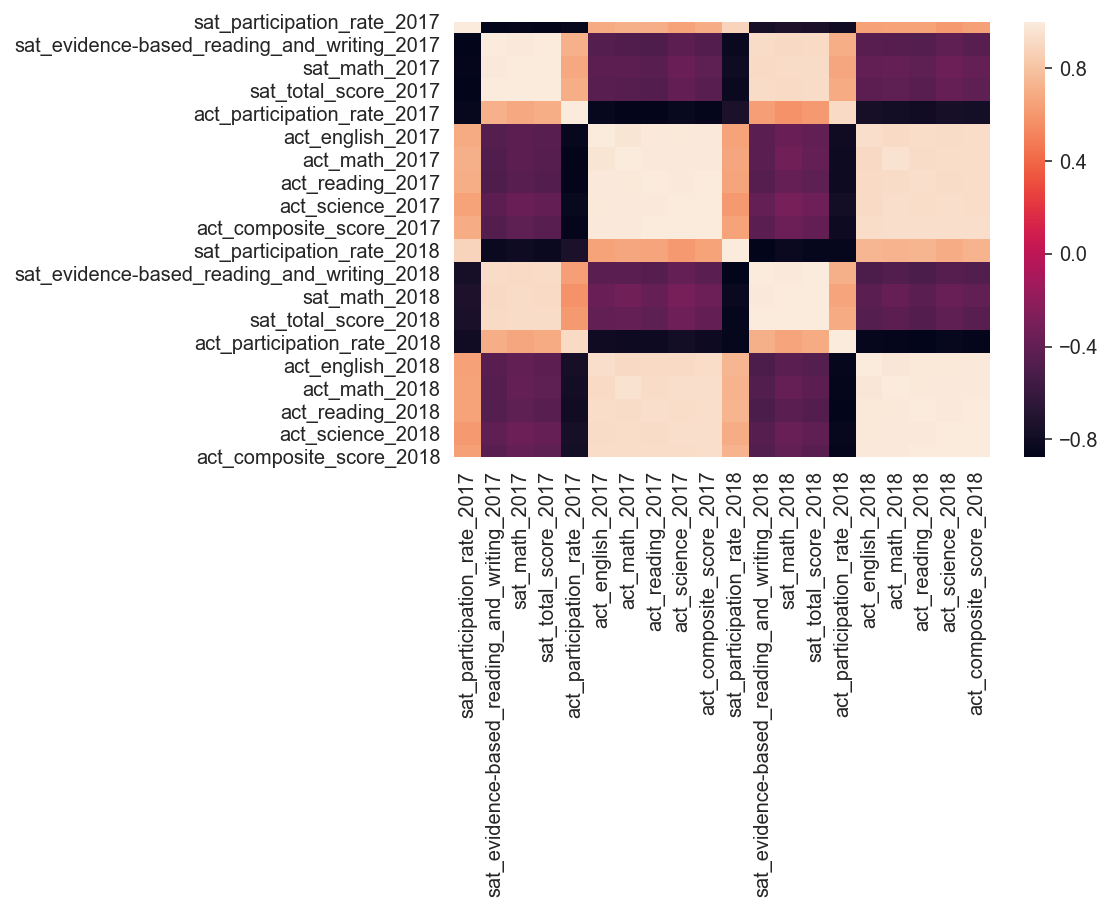

In [82]:
sns.heatmap(final_combined.corr()) ### Good, but might want to mask half the values next time

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [83]:
def subplot_histograms(list_of_columns, list_of_titles, list_of_xlabels, dataframe = final_combined):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

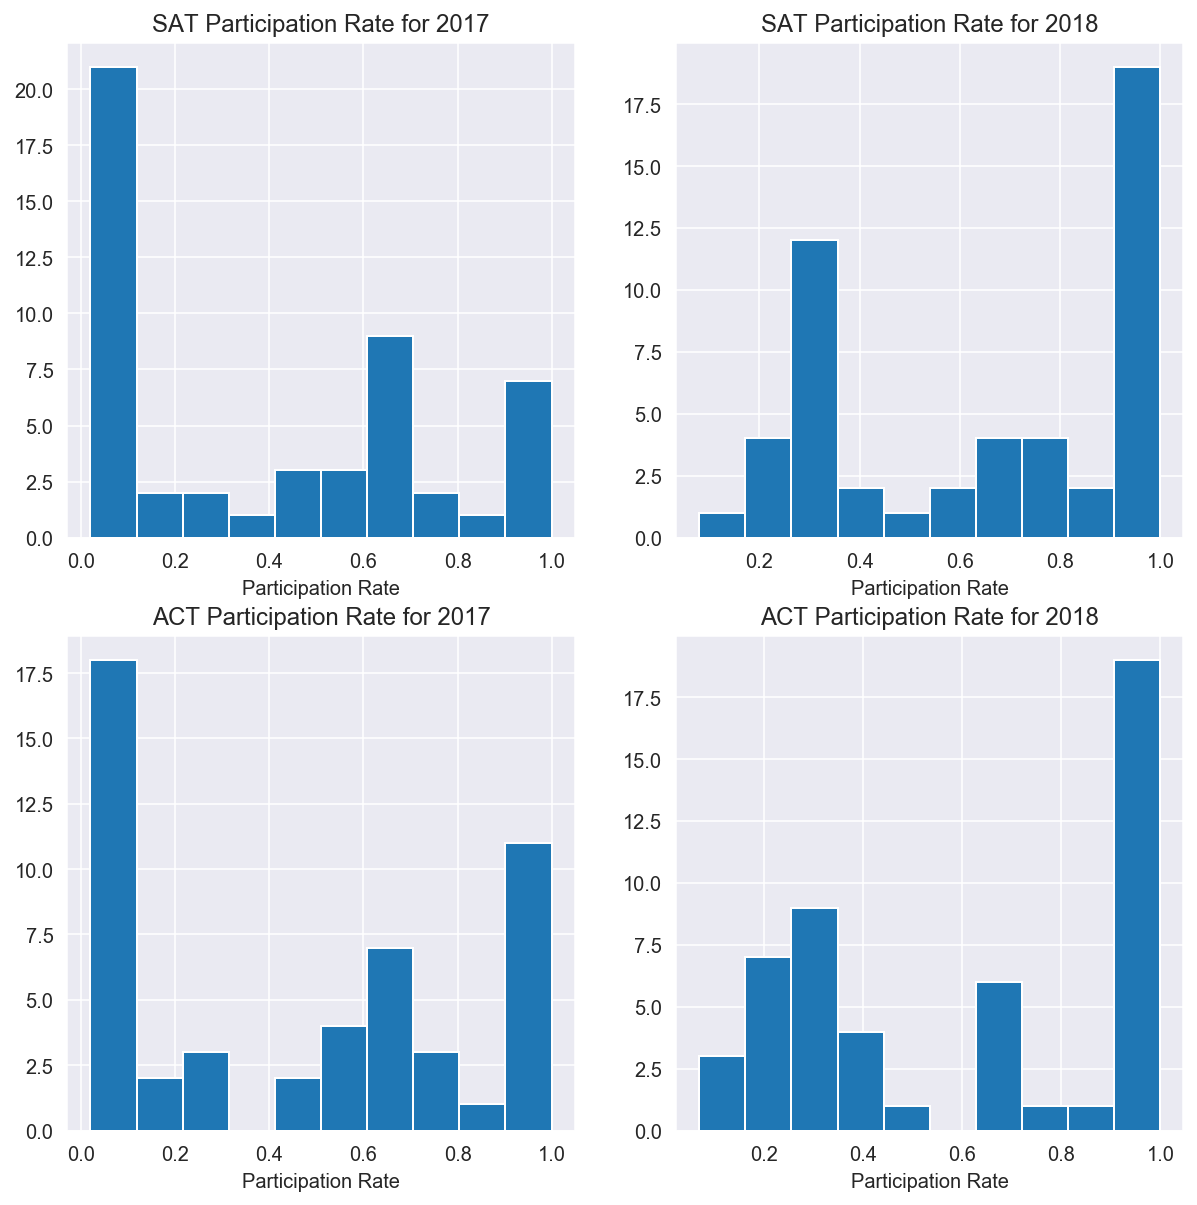

In [84]:
# Code
list_of_columns = [x for x in final_combined.columns if 'participation' in x]

list_of_titles = ['SAT Participation Rate for 2017', 'SAT Participation Rate for 2018', 'ACT Participation Rate for 2017', 'ACT Participation Rate for 2018']

list_of_xlabels = ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate']

subplot_histograms(list_of_columns, list_of_titles, list_of_xlabels)

In [85]:
### It's difficult to compare across SAT scores when the two plots don't share the same y-axis scaling.
### Scaling should be consistent for comparison to be meaningful.
### The additional kwarg (keyword argument) that needs to be specified in the function
### should be plt.subplots(..., sharey='row') for it to share the y-axes across subplot rows.
### Otherwise nice plots.

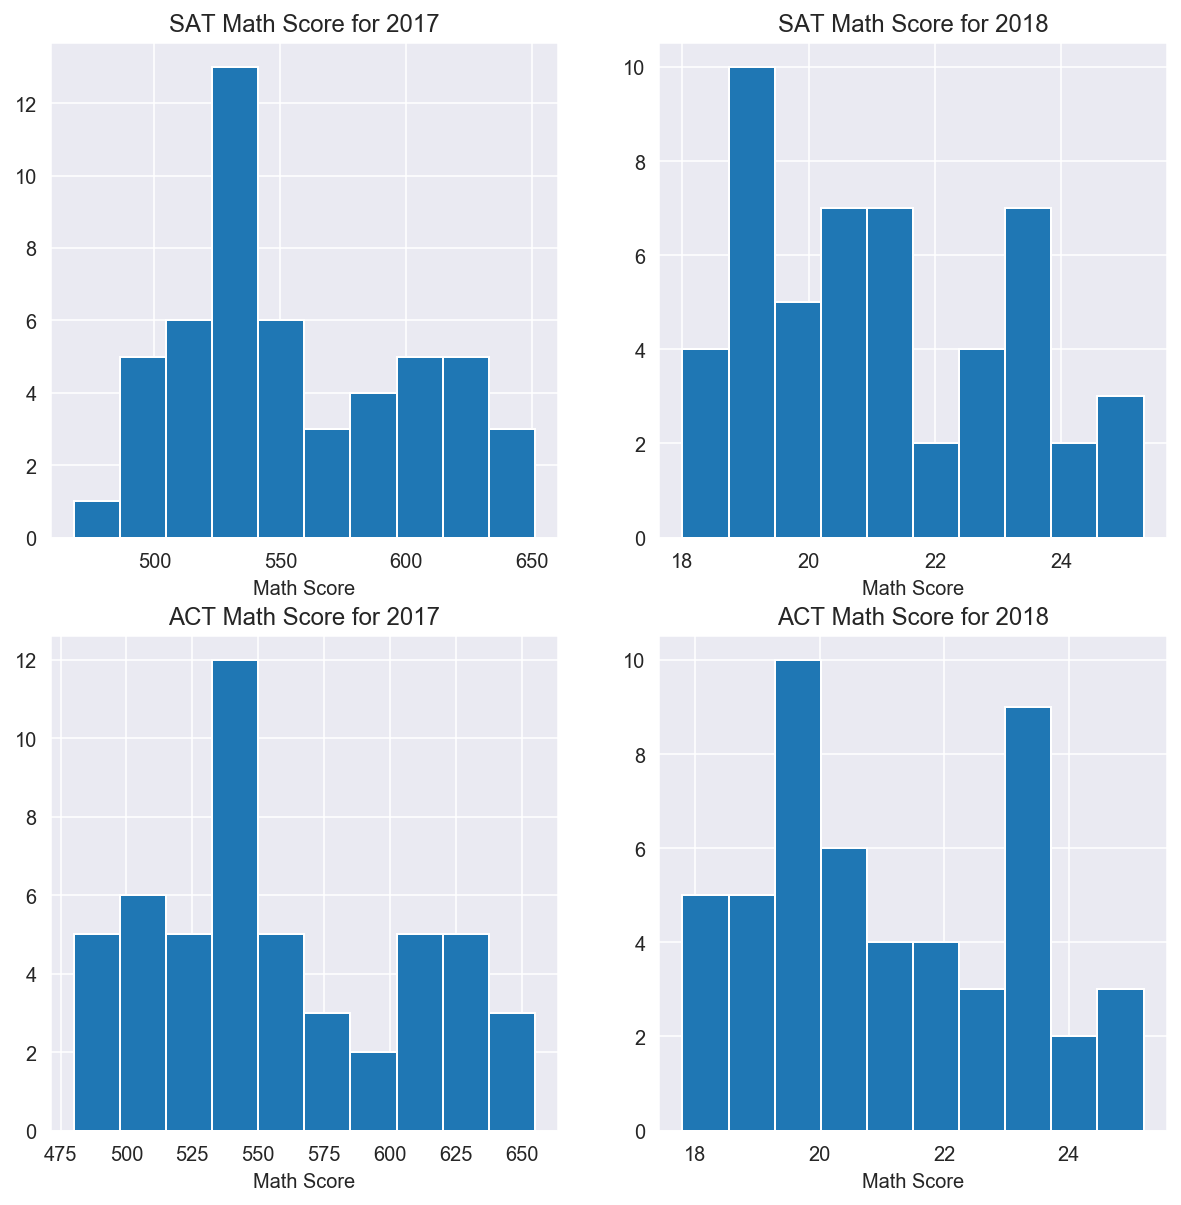

In [86]:
# Code
list_of_columns = [x for x in final_combined.columns if 'math' in x]

list_of_titles = ['SAT Math Score for 2017', 'SAT Math Score for 2018', 'ACT Math Score for 2017', 'ACT Math Score for 2018']

list_of_xlabels = ['Math Score', 'Math Score', 'Math Score', 'Math Score']

subplot_histograms(list_of_columns, list_of_titles, list_of_xlabels)

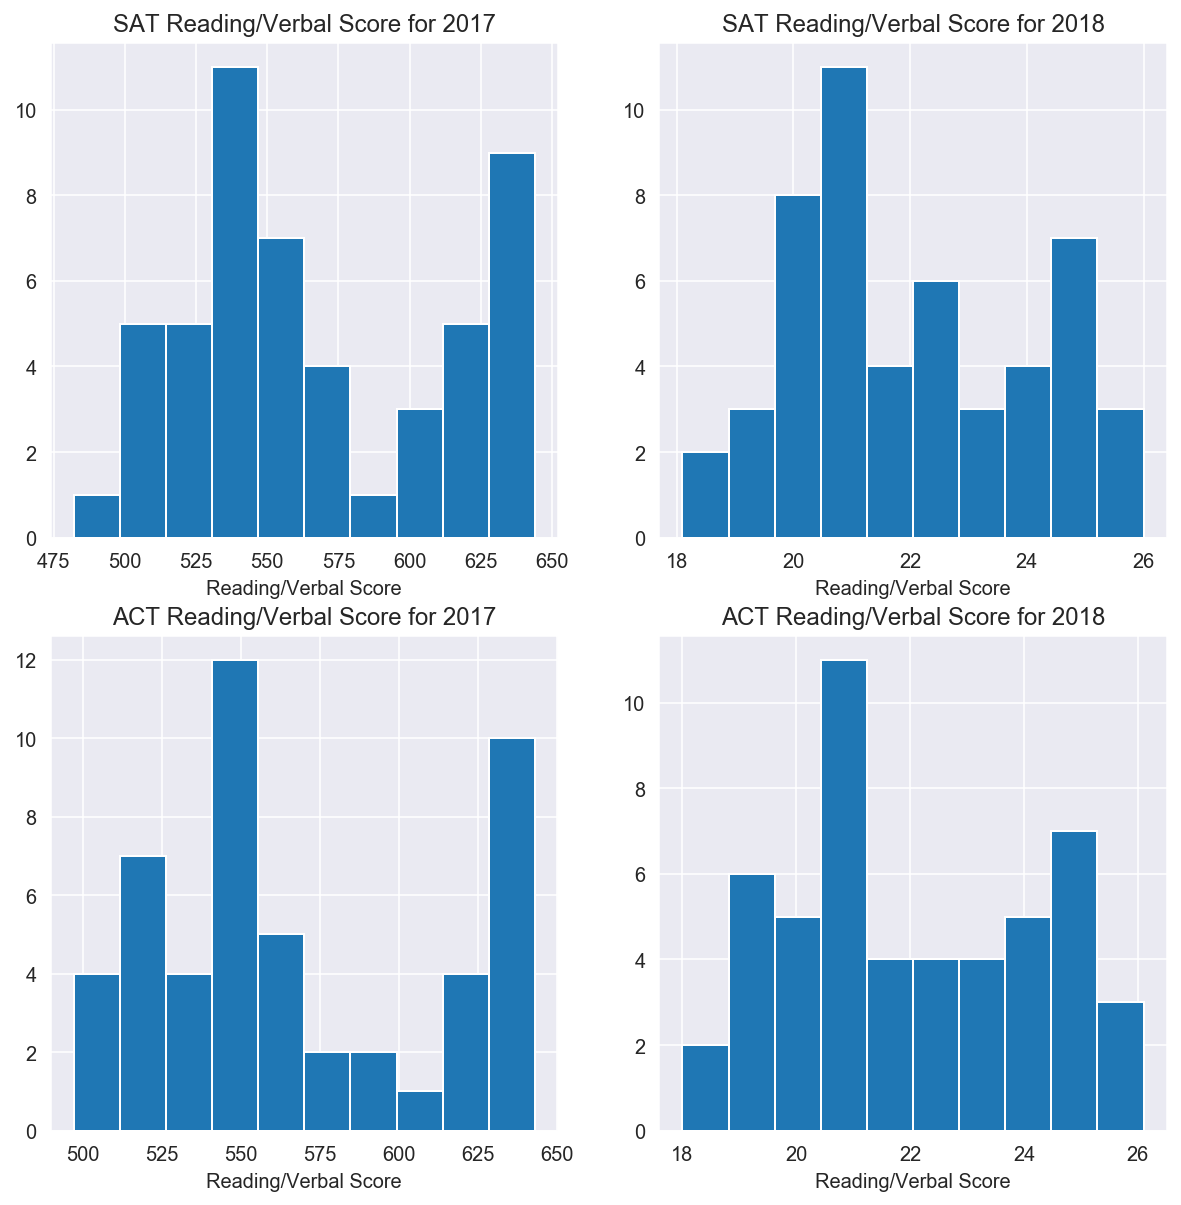

In [87]:
# Code
list_of_columns = [x for x in final_combined.columns if 'reading' in x]

list_of_titles = ['SAT Reading/Verbal Score for 2017', 'SAT Reading/Verbal Score for 2018', 'ACT Reading/Verbal Score for 2017', 'ACT Reading/Verbal Score for 2018']

list_of_xlabels = ['Reading/Verbal Score', 'Reading/Verbal Score', 'Reading/Verbal Score', 'Reading/Verbal Score']

subplot_histograms(list_of_columns, list_of_titles, list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [88]:
def scatterplot(x, y, title, xlabel, ylabel):
    dataset = final_combined
    
    plt.title(title, fontsize = 22)
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 18)
    plt.tick_params(labelsize = 12)
    
    return plt.scatter(dataset[x], dataset[y], s = 80, c = 'navy')

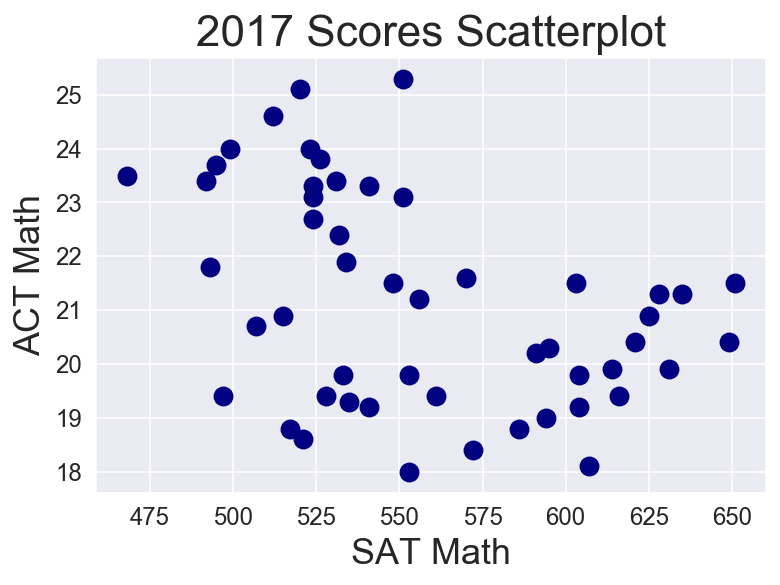

In [89]:
# Code

#SAT vs. ACT math scores for 2017
scatterplot('sat_math_2017', 'act_math_2017', '2017 Scores Scatterplot', 'SAT Math', 'ACT Math')

In [90]:
### Underperformers/overperformers are not immediately obvious from the plot. 
### Maybe a bar plot would be better in this case. But don't go overboard with 50+ bars.

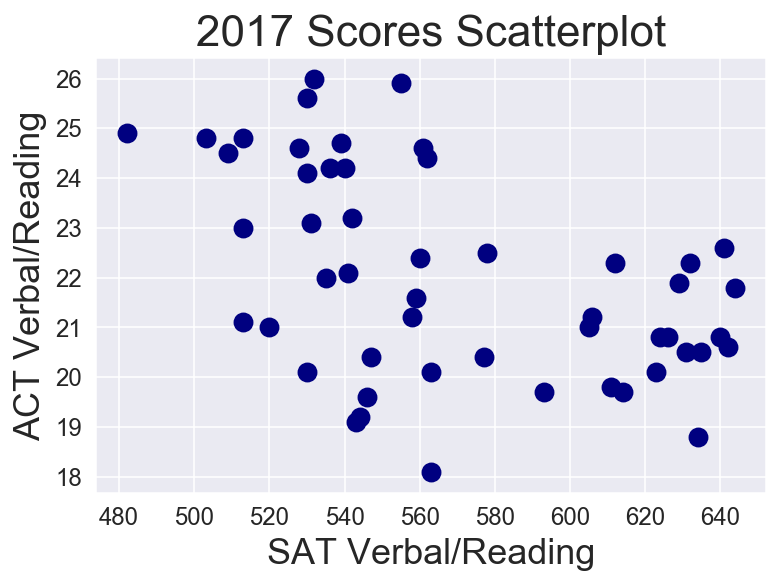

In [91]:
#SAT vs. ACT verbal/reading scores for 2017
scatterplot('sat_evidence-based_reading_and_writing_2017',
            'act_reading_2017',
            '2017 Scores Scatterplot',
            'SAT Verbal/Reading', 'ACT Verbal/Reading')

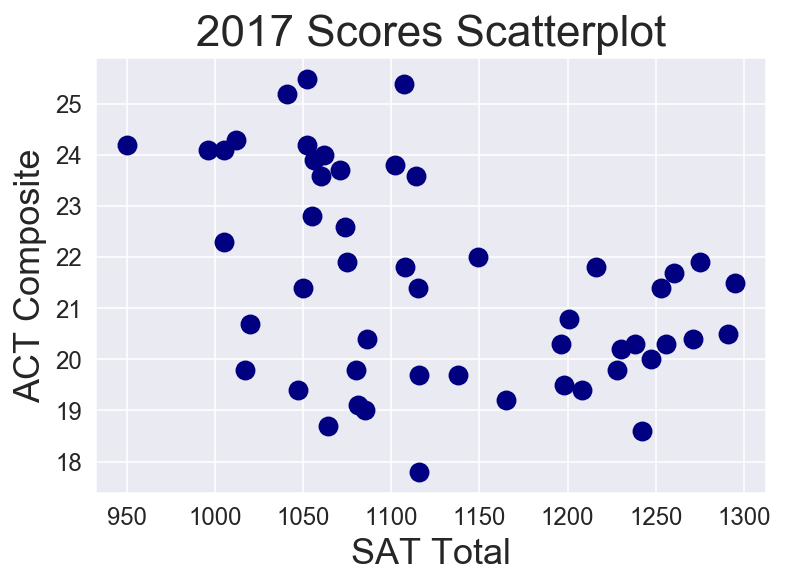

In [92]:
#SAT vs. ACT total/composite scores for 2017
scatterplot('sat_total_score_2017',
            'act_composite_score_2017',
           '2017 Scores Scatterplot',
            'SAT Total', 'ACT Composite')

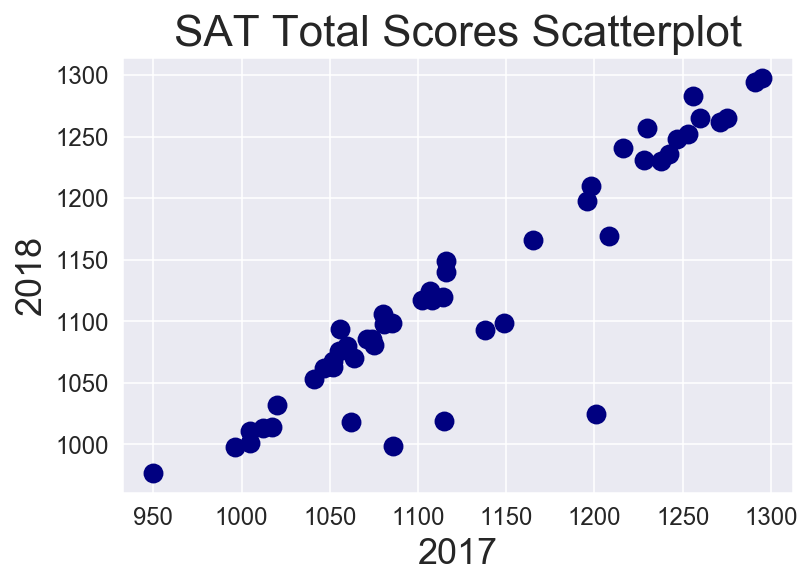

In [93]:
# Total scores for SAT 2017 vs. 2018
scatterplot('sat_total_score_2017',
            'sat_total_score_2018',
           'SAT Total Scores Scatterplot',
            '2017', '2018')

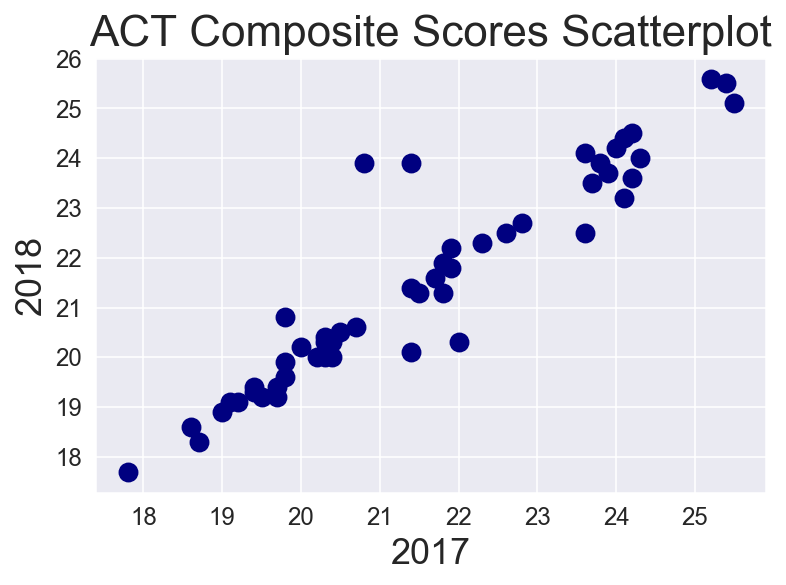

In [94]:
#Composite scores for ACT 2017 vs. 2018
scatterplot('act_composite_score_2017',
            'act_composite_score_2018',
            'ACT Composite Scores Scatterplot',
            '2017', '2018')

In [95]:
### Generally correct, but drawing a act_total_2018 = act_total_2017 y=x line and annotating the outliers would help with 
### the visualisation. States in the region above would have act_total_2018 > act_total_2017. Annotation can be
### done using matplotlib.pyplot.annotate (see documentation).

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [96]:
# split overall dataset into 4 seperate datasets, in accordance with their respective scales (range of values)
# the 4 datasets are: SAT Subject Scores, SAT Total Scores, SAT + ACT Participation Rates, ACT Scores (includes subject scores + composite scores)
# then proceed to boxplot each of these different datasets

# create SAT-subjects-only dataset first
sat_subj = pd.concat([final_combined.iloc[:, 2:4] , final_combined.iloc[:, 12:14]], axis = 1)
sat_subj.head()

,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_evidence-based_reading_and_writing_2018,sat_math_2018
0,593,572,595,571
1,547,533,562,544
2,563,553,577,572
3,614,594,592,576
4,531,524,540,536


In [97]:
# next, create SAT Total Scores dataset
sat_total = pd.concat([final_combined['sat_total_score_2017'], final_combined['sat_total_score_2018']], axis = 1)
sat_total.head()

,sat_total_score_2017,sat_total_score_2018
0,1165,1166
1,1080,1106
2,1116,1149
3,1208,1169
4,1055,1076


In [98]:
# next, create SAT & ACT Participation Rates dataset
sat_act_part = pd.concat([final_combined['sat_participation_rate_2017'], final_combined['act_participation_rate_2017']], axis = 1)
sat_act_part.head()

,sat_participation_rate_2017,act_participation_rate_2017
0,0.05,1.00
1,0.38,0.65
2,0.30,0.62
3,0.03,1.00
4,0.53,0.31


In [99]:
# lastly, create ACT Scores (subjects and composite) dataset
act_scores = pd.concat([final_combined.iloc[:, 6:11], final_combined.iloc[:, 16:]], axis = 1)
act_scores.head()

,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_score_2017,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_score_2018
0,18.9,18.4,19.7,19.4,19.2,18.9,18.3,19.6,19.0,19.1
1,18.7,19.8,20.4,19.9,19.8,19.8,20.6,21.6,20.7,20.8
2,18.6,19.8,20.1,19.8,19.7,18.2,19.4,19.5,19.2,19.2
3,18.9,19.0,19.7,19.5,19.4,19.1,18.9,19.7,19.4,19.4
4,22.5,22.7,23.1,22.2,22.8,22.5,22.5,23.0,22.1,22.7


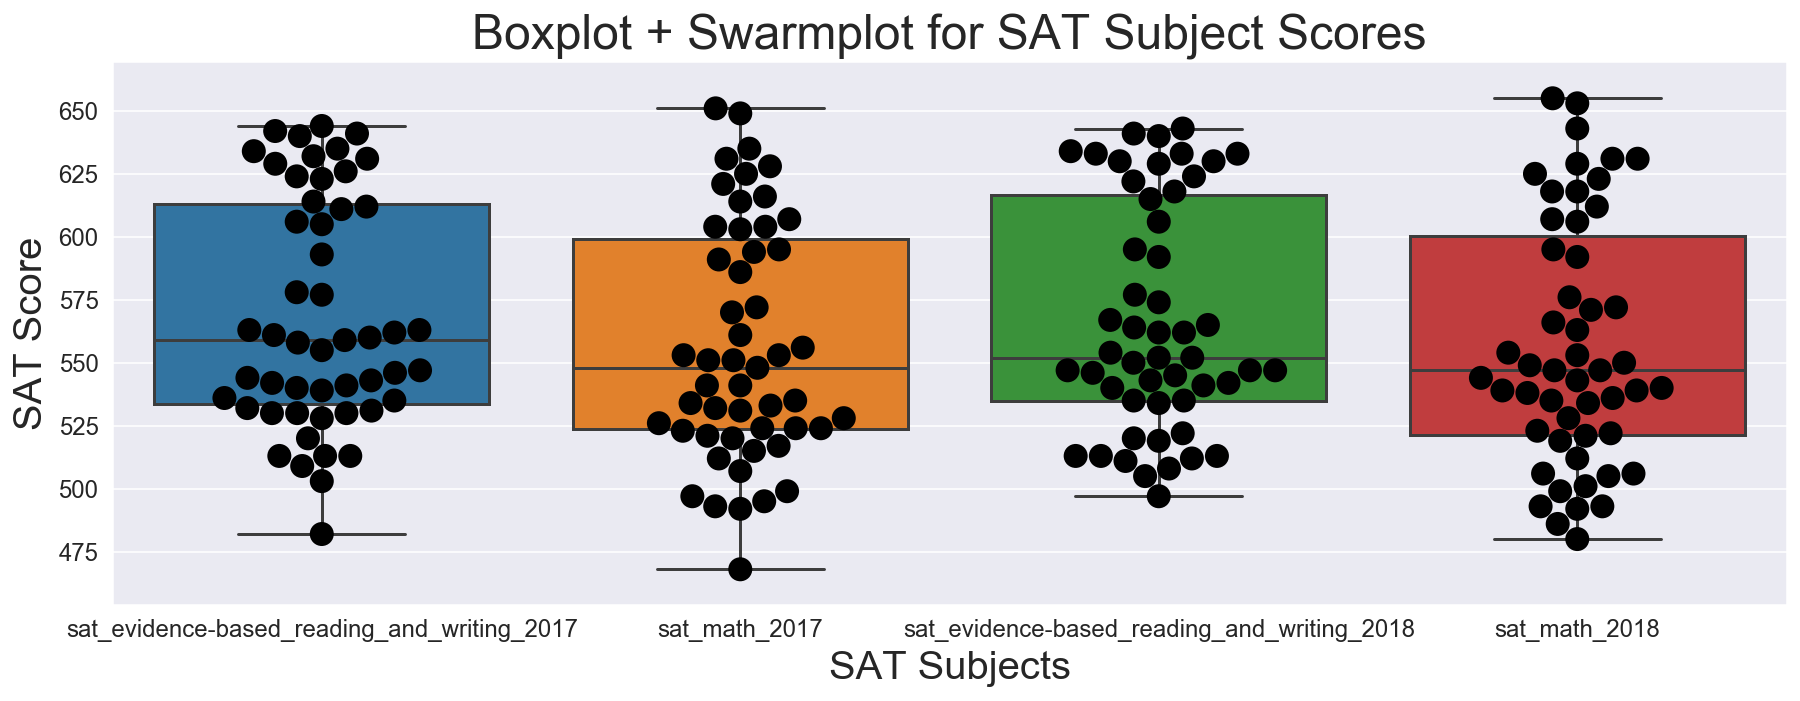

In [100]:
# plot Seaborn boxplots for the above 4 datasets
# also plot overlapping swarmplot to observe scatter of datapoints
# Code

plt.figure(figsize=(15, 5))
plt.title("Boxplot + Swarmplot for SAT Subject Scores", loc="center",fontsize=24)

sat_subj_plot = sns.boxplot(data=sat_subj)

sat_subj_plot.set_xlabel("SAT Subjects", fontsize = 20)
sat_subj_plot.set_ylabel("SAT Score", fontsize = 20)
sat_subj_plot.tick_params(labelsize = 12)

sns.swarmplot(data=sat_subj, color="black", size=12)

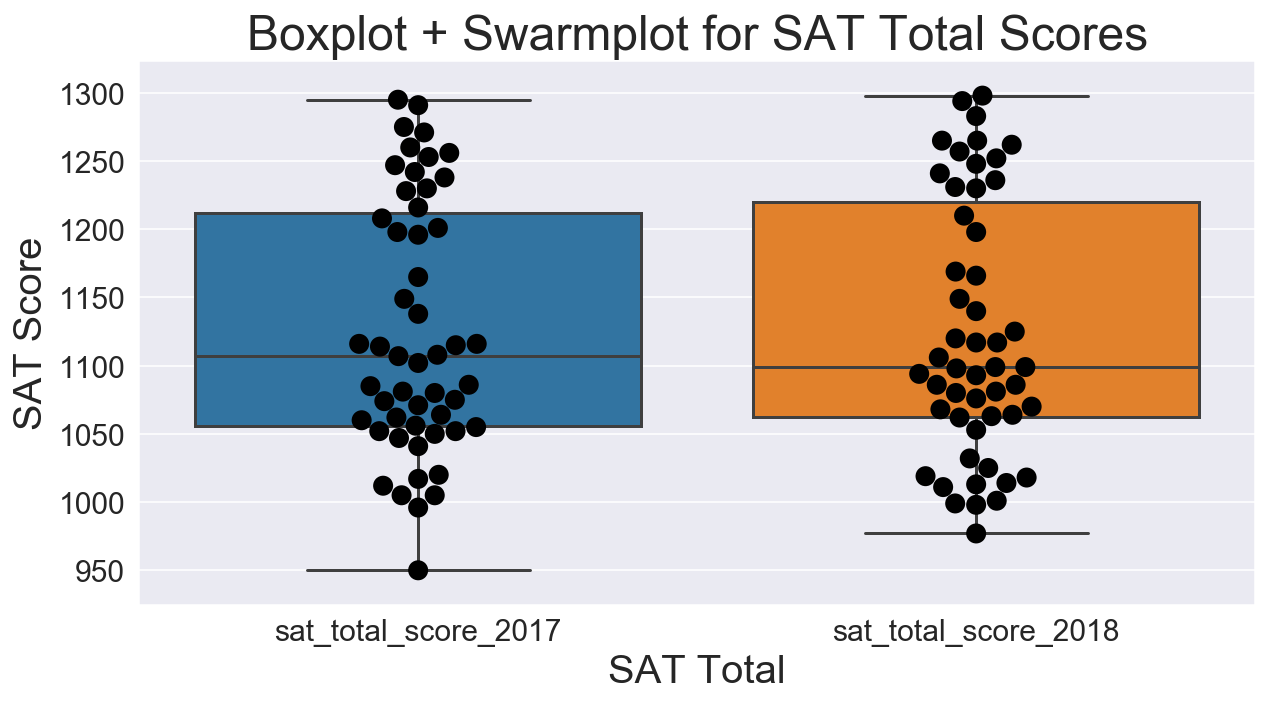

In [101]:
plt.figure(figsize=(10, 5))
plt.title("Boxplot + Swarmplot for SAT Total Scores", loc="center", fontsize = 24)

sat_total_plot = sns.boxplot(data=sat_total)

sat_total_plot.set_xlabel("SAT Total", fontsize = 20)
sat_total_plot.set_ylabel("SAT Score", fontsize = 20)
sat_total_plot.tick_params(labelsize = 15)

sns.swarmplot(data=sat_total, color="black", size=10)

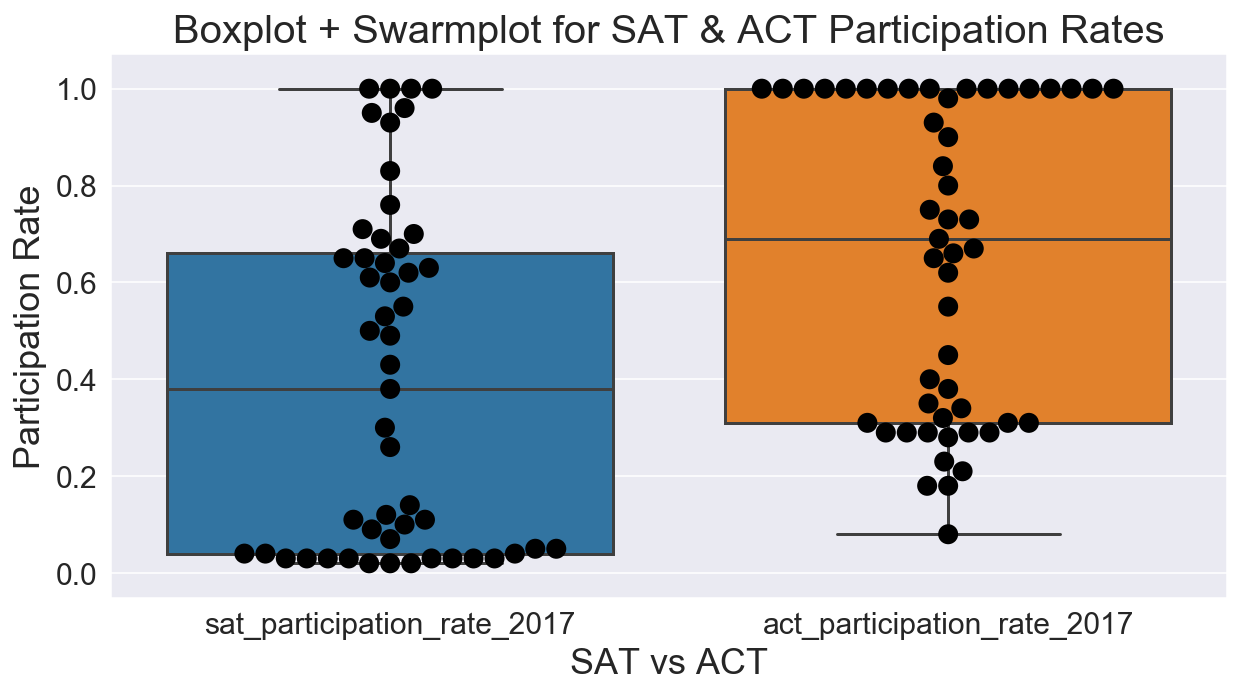

In [102]:
plt.figure(figsize=(10, 5))
plt.title("Boxplot + Swarmplot for SAT & ACT Participation Rates", loc="center", fontsize = 20)

sat_act_plot = sns.boxplot(data=sat_act_part)

sat_act_plot.set_xlabel("SAT vs ACT", fontsize = 18)
sat_act_plot.set_ylabel("Participation Rate", fontsize = 18)
sat_act_plot.tick_params(labelsize = 15)

sns.swarmplot(data=sat_act_part, color="black", size=10)

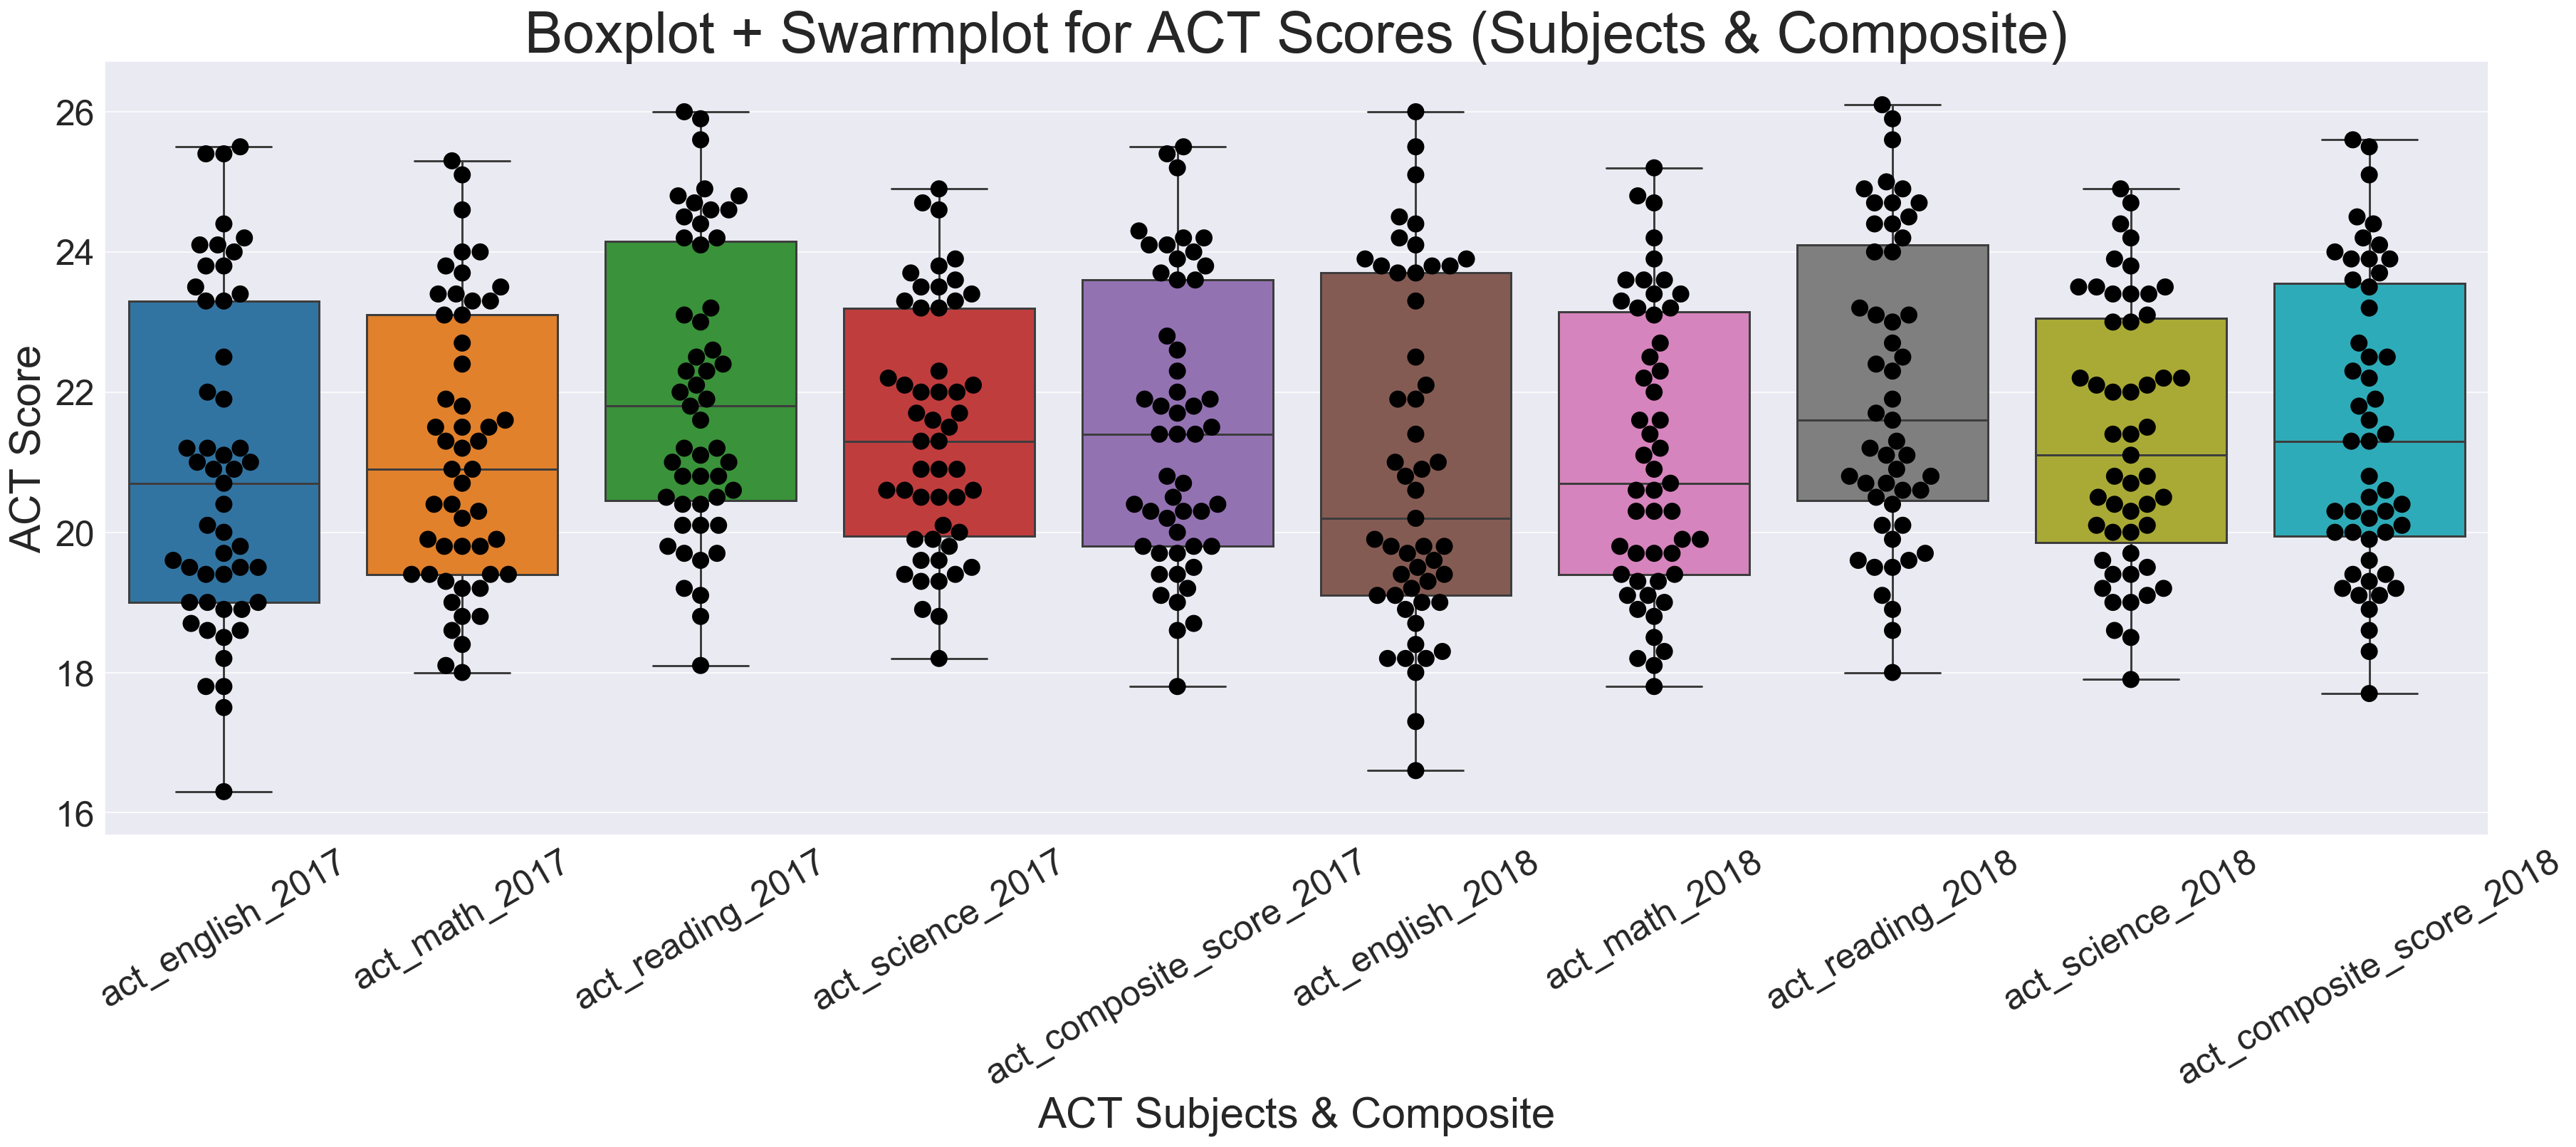

In [103]:
plt.figure(figsize=(30, 10))
plt.title("Boxplot + Swarmplot for ACT Scores (Subjects & Composite)", loc="center", fontsize = 40)

act_scores_plot = sns.boxplot(data=act_scores)

act_scores_plot.set_xlabel("ACT Subjects & Composite", fontsize = 30)
act_scores_plot.set_ylabel("ACT Score", fontsize = 30)
act_scores_plot.tick_params(labelsize = 25)
plt.xticks(rotation = 30)

sns.swarmplot(data=act_scores, color="black", size=12)

In [104]:
### Nice.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [105]:
final_combined.mode(numeric_only=True)

,sat_participation_rate_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_score_2017,act_participation_rate_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_score_2017,sat_participation_rate_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_score_2018,act_participation_rate_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_score_2018
0,0.03,513.0,524.0,1005.0,1.0,19.0,19.4,20.1,20.5,19.8,0.03,513.0,493,1086.0,1.0,18.2,19.7,24.7,22.2,20.0
1,NaN,530.0,NaN,1052.0,NaN,19.5,NaN,20.8,20.6,20.3,0.04,547.0,506,1099.0,NaN,19.8,20.3,NaN,23.4,20.3
2,NaN,NaN,NaN,1116.0,NaN,21.2,NaN,NaN,20.9,21.4,NaN,633.0,539,1117.0,NaN,23.8,23.6,NaN,23.5,23.9
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,547,1265.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
final_combined.describe()  ### Try transposing the table next time using final_combined.describe().T so it's more readable. 

,sat_participation_rate_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_score_2017,act_participation_rate_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_score_2017,sat_participation_rate_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_score_2018,act_participation_rate_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_score_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.452941,21.519608,0.466275,567.294118,557.254902,1124.666667,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.741419,2.020695,0.380142,45.317676,48.887562,93.868561,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,497.000000,480.000000,977.000000,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,535.000000,521.500000,1062.500000,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,547.000000,1099.000000,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.795000,616.500000,600.500000,1220.000000,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000


sat_participation_rate_2017:
- Positively-skewed distribution
- mean is 0.398039
- standard deviation is 0.352766
- mode is 0.03
- median is 0.38
- range of 0.02 to 1.00.

sat_evidence-based_reading_and_writing_2017:
- Bimodal distribution
- mean is 569.117647
- standard deviation is 45.666901
- mode is 513 and 530
- median is 559
- range of 482 to 644

sat_math_2017:
- Positively-skewed distribution
- mean is 556.882353
- standard deviation is 47.121395
- mode is 524
- median is 548
- range of 468 to 651

sat_total_score_2017:
- Positively-skewed distribution
- mean is 1126.098039
- standard deviation is 92.494812
- mode is 1005, 1052, 1116
- median is 1107
- range of 950 to 1295

act_participation_rate_2017:
- Negatively-skewed distribution
- mean is 0.652549
- standard deviation is 0.321408
- mode is 1.0
- median is 0.69
- range of 0.08 to 1.0

act_english_2017:
- Positively-skewed distribution
- mean is 20.931373
- standard deviation is 2.353677
- mode is 19.0, 19.5, 21.2
- median is 20.7
- range of 16.3 to 25.5

act_math_2017:
- Positively-skewed distribution
- mean is 21.182353
- standard deviation is 1.981989
- mode is 19.4
- median is 20.9
- range of 18 to 25.3

act_reading_2017:
- Positively-skewed distribution
- mean is 22.013725
- standard deviation is 2.067271
- mode is 20.1, 20.8
- median is 21.8
- range of 18.1 to 26

act_science_2017:
- Positively-skewed distribution
- mean is 21.452941
- standard deviation is 1.741419
- mode is 20.5, 20.6, 20.9, 22.0
- median is 21.3
- range of 18.2 to 24.9

act_composite_score_2017:
- Positively-skewed distribution
- mean is 21.519608
- standard deviation is 2.020695
- mode is 19.8, 20.3, 21.4
- median is 21.4
- range of 17.8 to 25.5

sat_participation_rate_2018:
- Bimodal distribution
- mean is 0.457451
- standard deviation is 0.373143
- mode is 0.03, 0.04
- median is 0.52
- range of 0.02 to 1.00

sat_evidence-based_reading_and_writing_2018:
- Bimodal distribution
- mean is 567.764706
- standard deviation is 44.968250
- mode is 513, 547, 633
- median is 616.5
- range of 497 to 643

sat_math_2018:
- Positively-skewed distribution
- mean is 558.215686
- standard deviation is 48.103353
- mode is 506, 547, 549, 618, 631
- median is 547
- range of 480 to 655

sat_total_score_2018:
- Positively-skewed distribution
- mean is 1126.098039
- standard deviation is 92.730201
- mode is 1099
- median is 1099
- range of 977 to 1298

act_participation_rate_2018:
- Negatively-skewed distribution
- mean is 0.616471
- standard deviation is 0.340910
- mode is 1.0
- median is 0.66
- range of 0.07 to 1.0

act_english_2018:
- Bimodal distribution
- mean is 20.988235
- standard deviation is 2.446356
- mode is 18.2, 19.8, 23.8
- median is 20.2
- range of 16.6 to 26

act_math_2018:
- Bimodal distribution
- mean is 21.125490
- standard deviation is 2.035765
- mode is 19.7, 20.3, 23.6
- median is 20.7
- range of 17.8 to 25.2

act_reading_2018:
- Positively-skewed distribution
- mean is 22.015686
- standard deviation is 2.167245
- mode is 24.7
- median is 21.6
- range of 18 to 26.1

act_science_2018:
- Positively-skewed distribution
- mean is 21.345098
- standard deviation is 1.870114
- mode is 22.2, 23.4, 23.5
- median is 21.1
- range of 17.9 to 24.9

act_composite_score_2018:
- Positively-skewed distribution
- mean is 21.486275
- standard deviation is 2.106278
- mode is 20.0, 20.3, 23.9
- median is 21.3
- range of 17.7 to 25.6

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

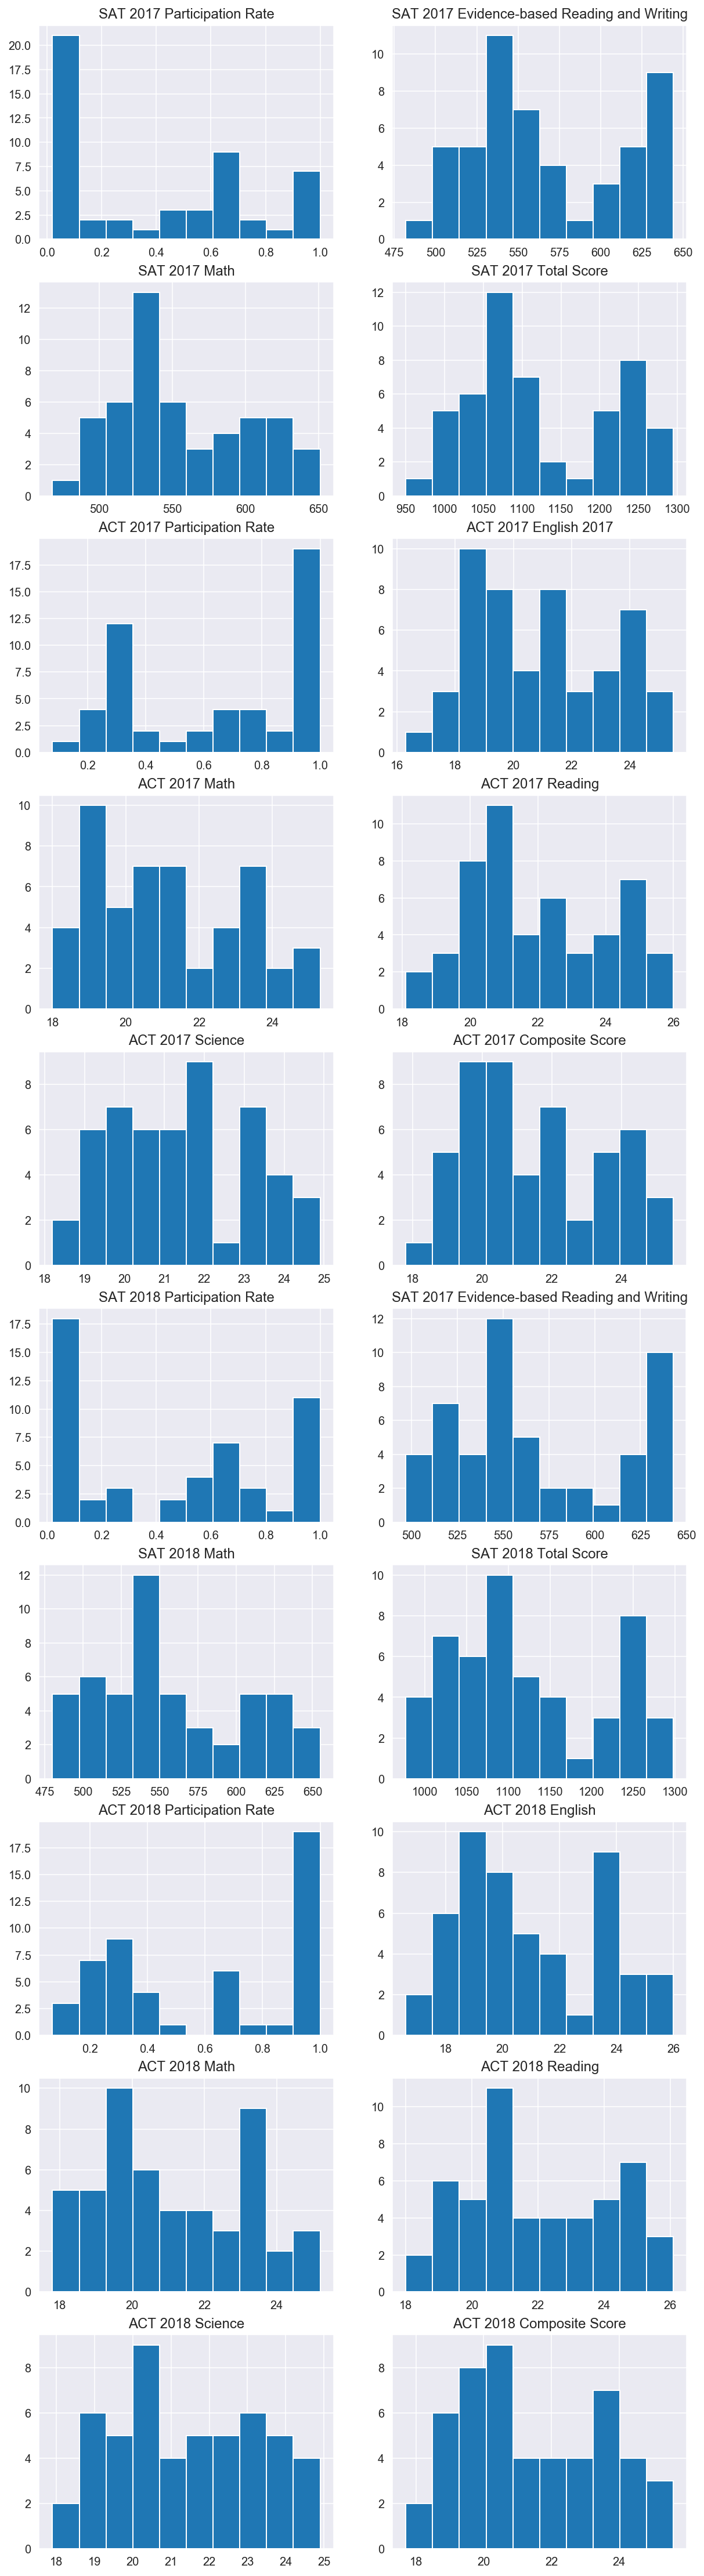

In [107]:
# plot histograms using Matplotlib via the previously-created function above

list_of_columns = [col for i, col in enumerate(final_combined.columns) if col != 'state']

list_of_titles = ['SAT 2017 Participation Rate',
 'SAT 2017 Evidence-based Reading and Writing',
 'SAT 2017 Math',
 'SAT 2017 Total Score',
 'ACT 2017 Participation Rate',
 'ACT 2017 English 2017',
 'ACT 2017 Math',
 'ACT 2017 Reading',
 'ACT 2017 Science',
 'ACT 2017 Composite Score',
 'SAT 2018 Participation Rate',
 'SAT 2017 Evidence-based Reading and Writing',
 'SAT 2018 Math',
 'SAT 2018 Total Score',
 'ACT 2018 Participation Rate',
 'ACT 2018 English',
 'ACT 2018 Math',
 'ACT 2018 Reading',
 'ACT 2018 Science',
 'ACT 2018 Composite Score']

def subplot_histograms(list_of_columns, list_of_titles, dataframe = final_combined):
            nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
            fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,40)) # You'll want to specify your figsize
            ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
            
            for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
                ax[i].hist(dataframe[column]) # feel free to add more settings
                ax[i].set_title(list_of_titles[i])

subplot_histograms(list_of_columns, list_of_titles)

C:\Users\Jonathan\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

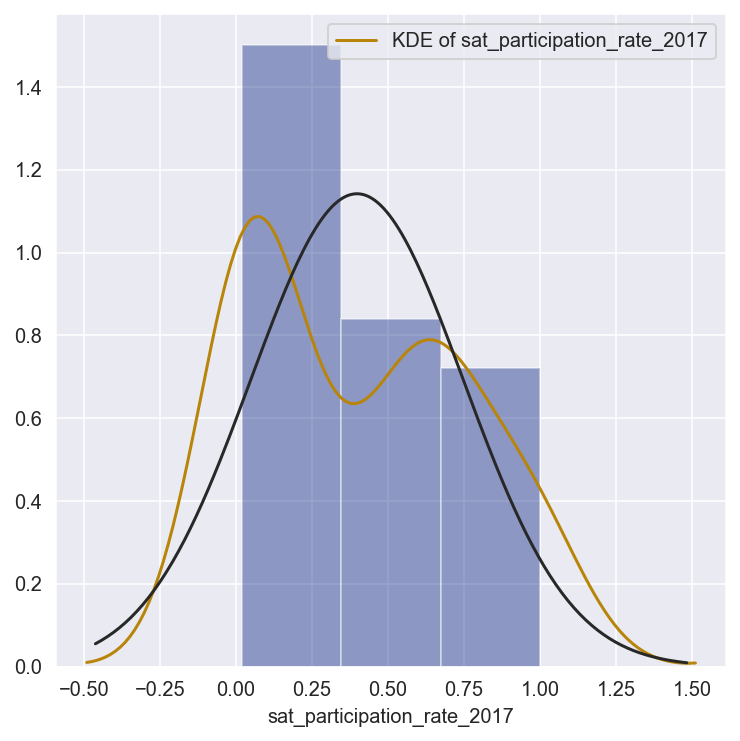

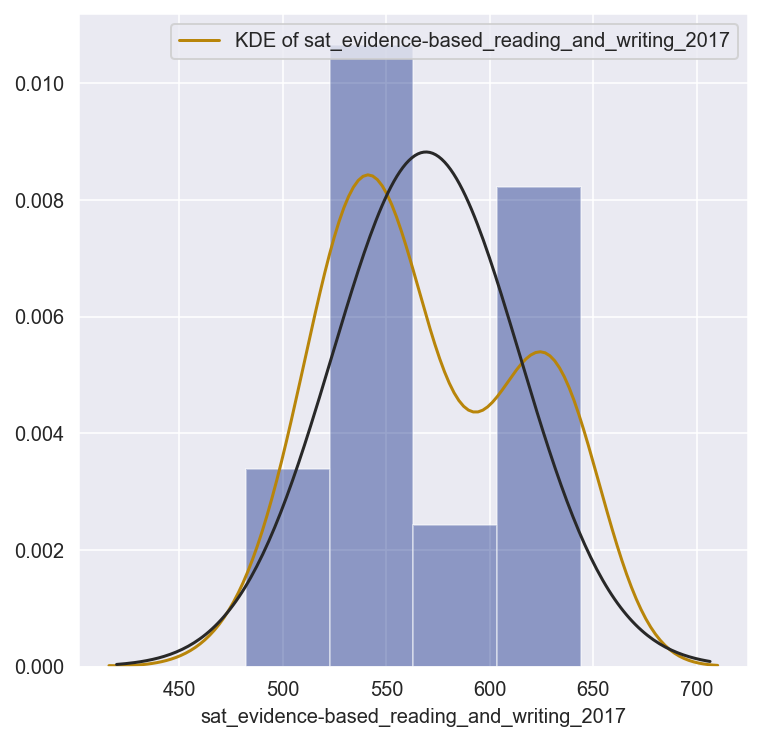

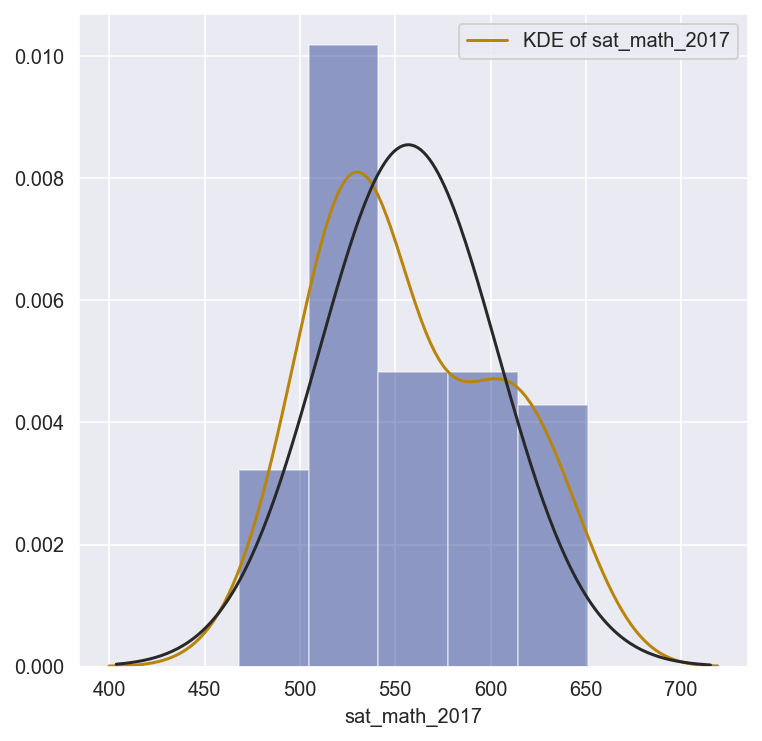

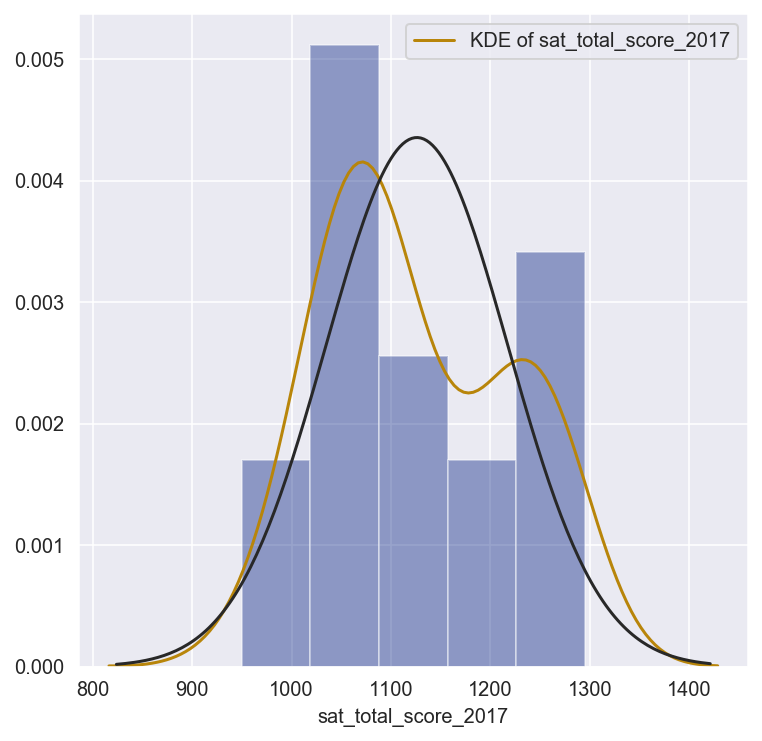

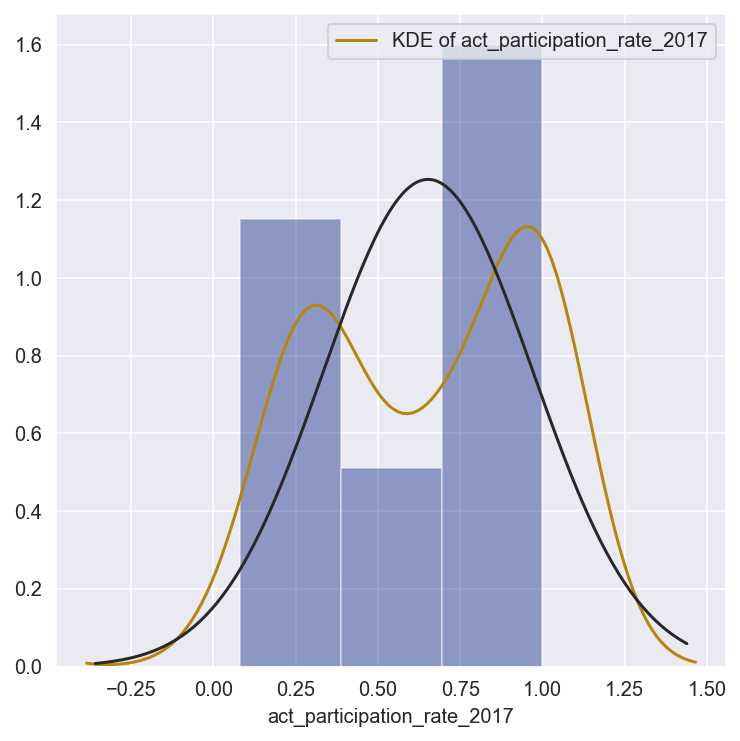

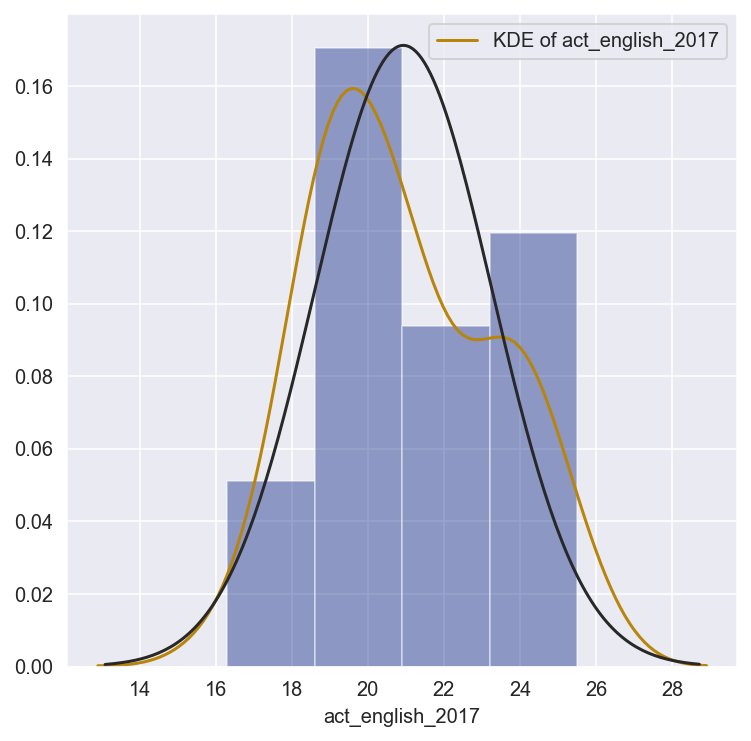

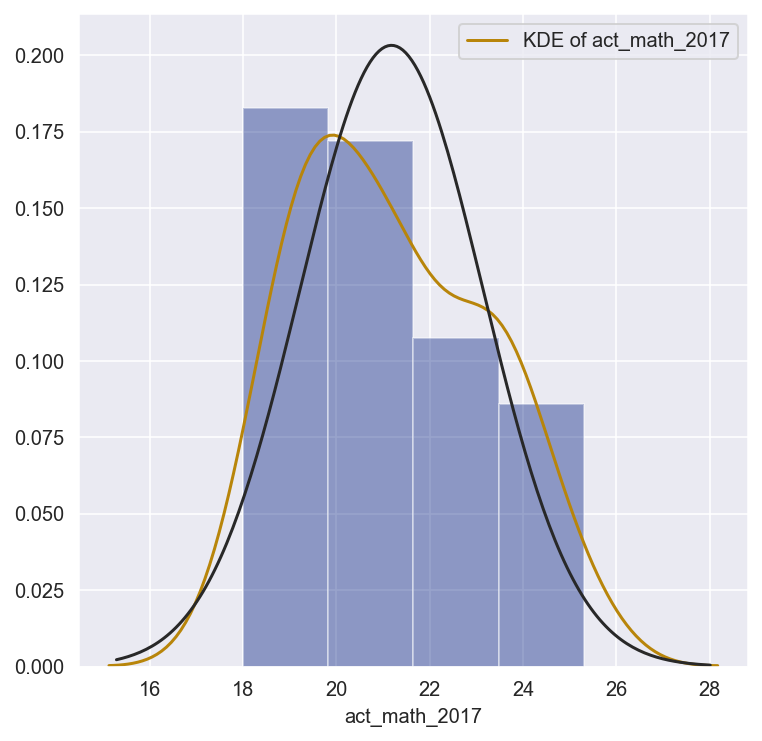

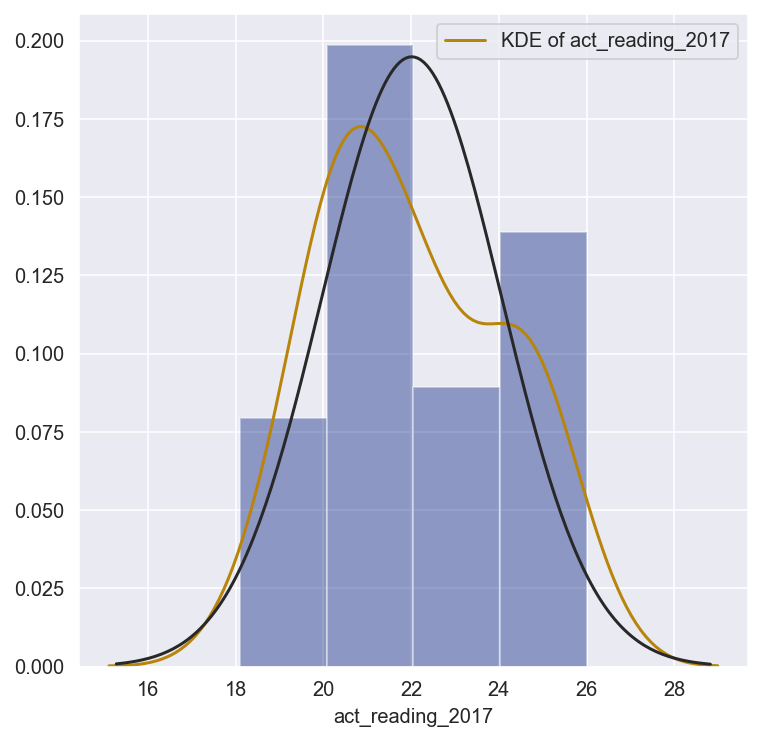

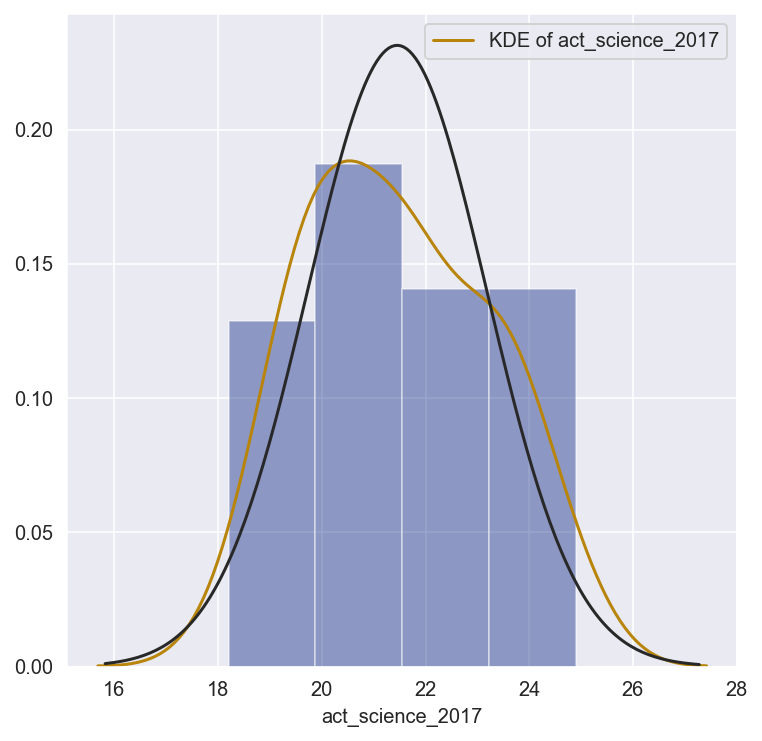

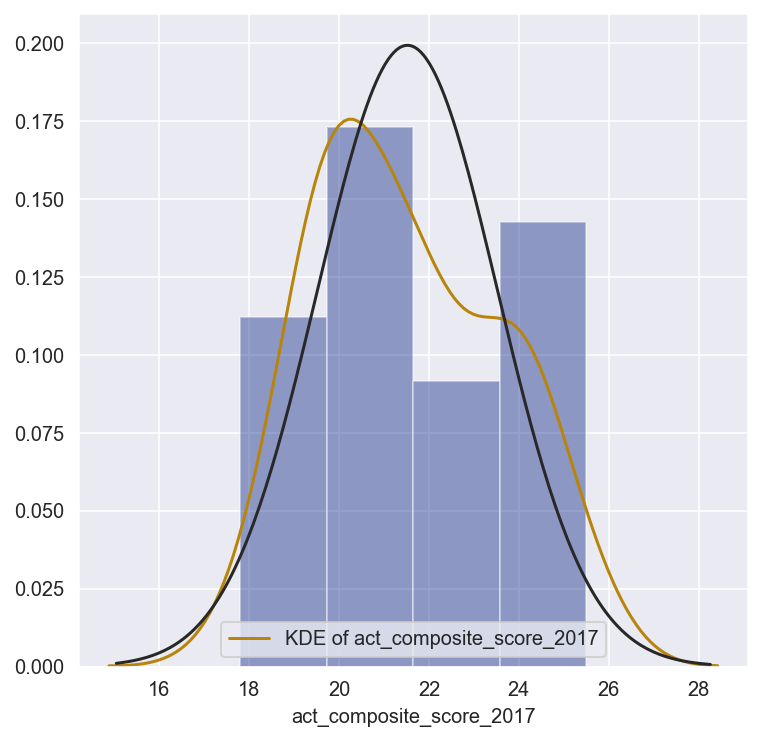

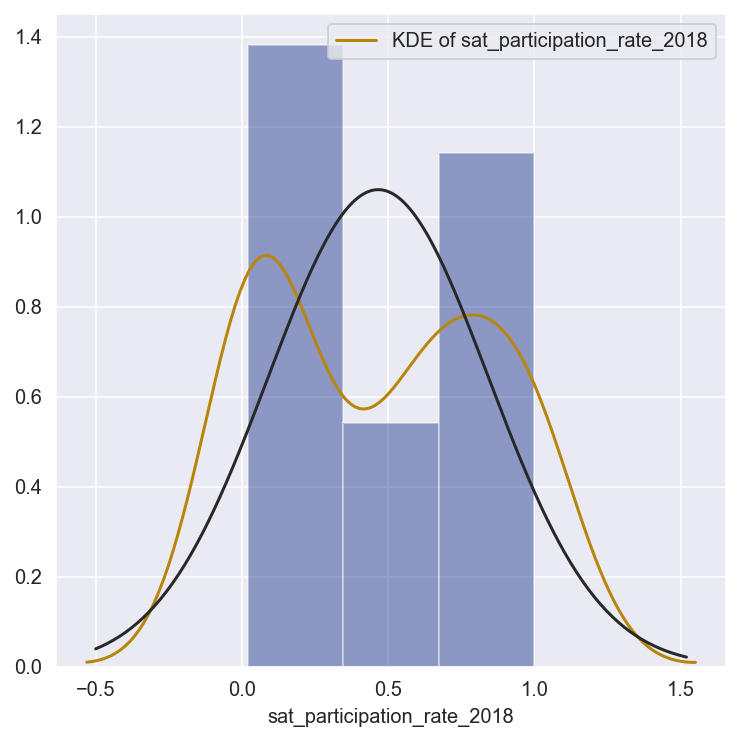

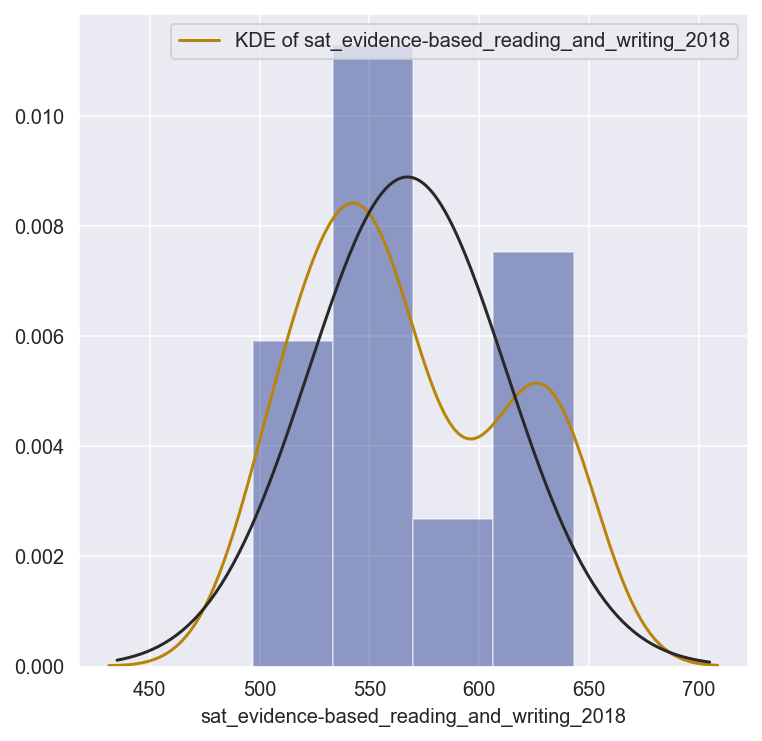

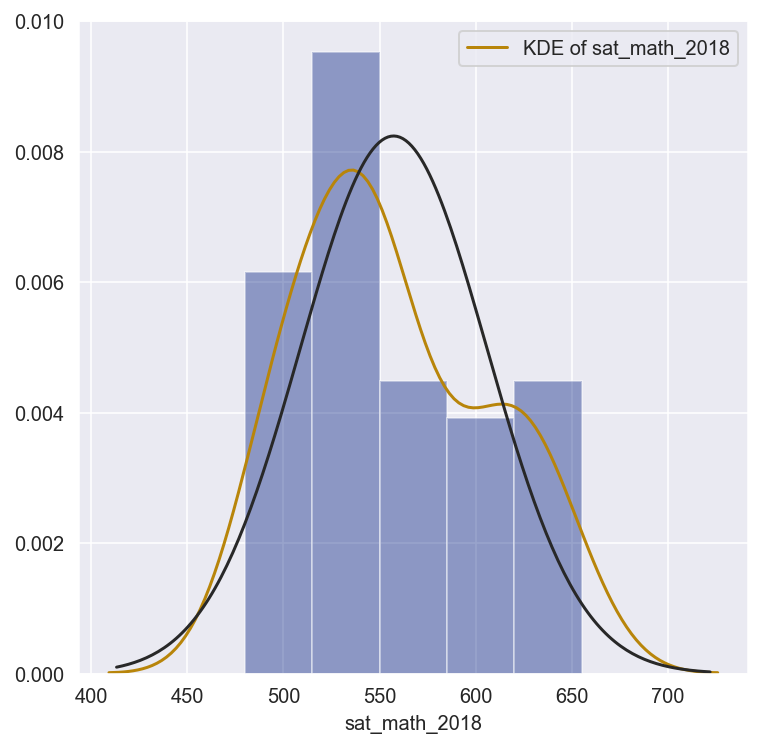

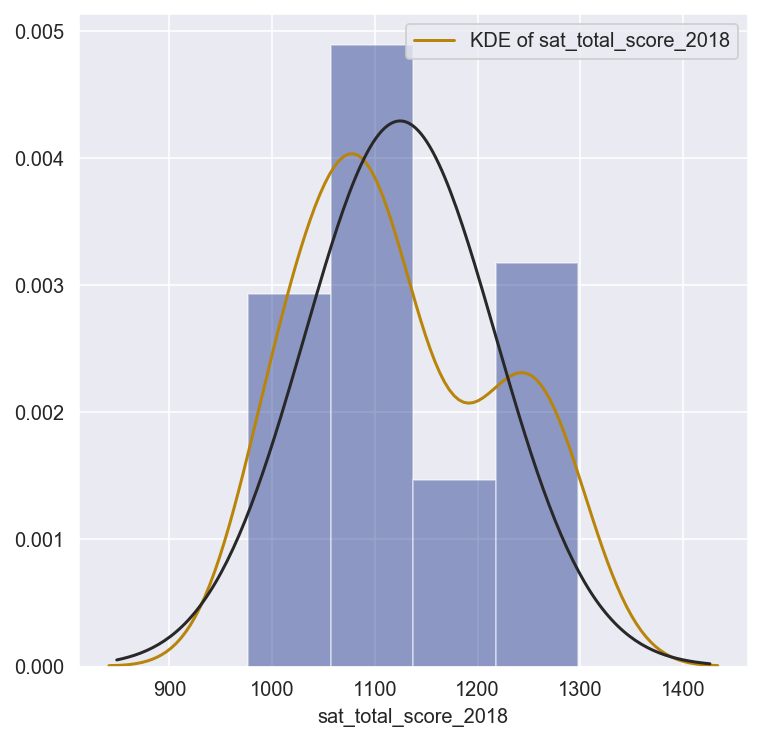

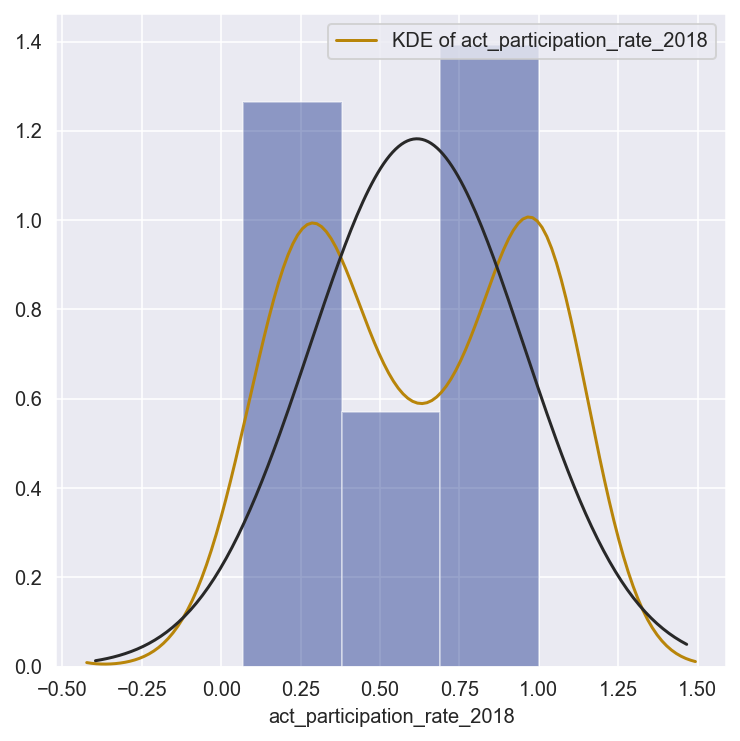

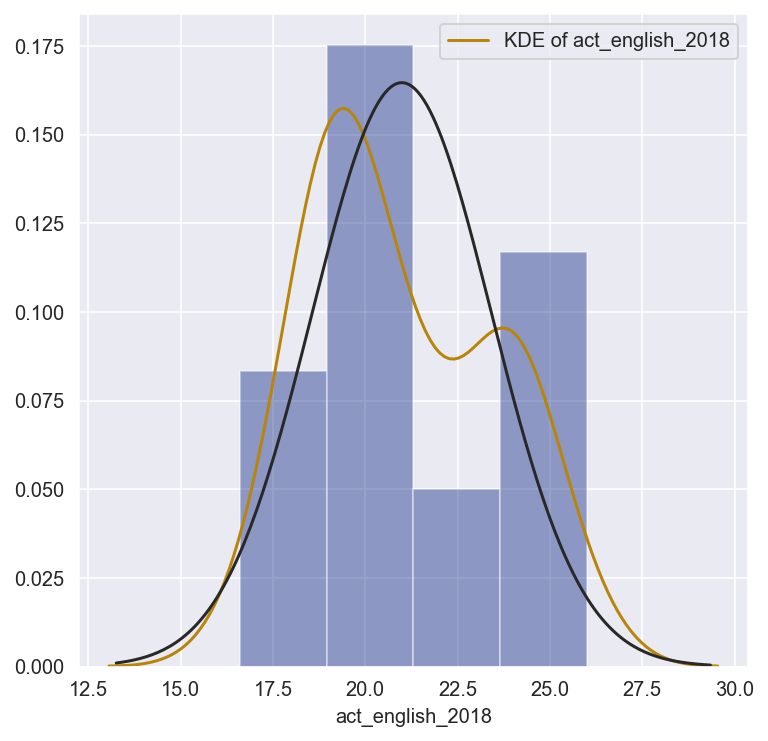

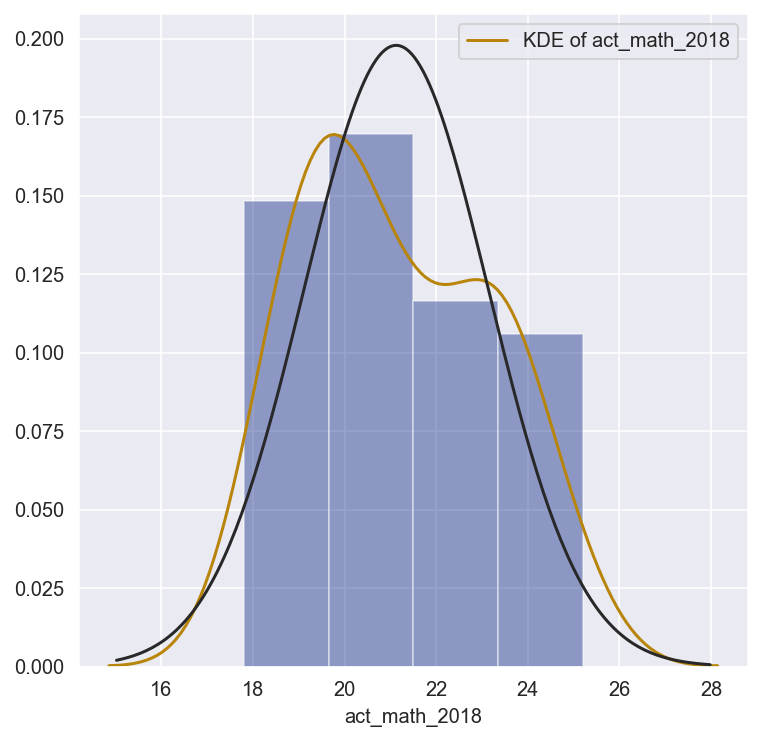

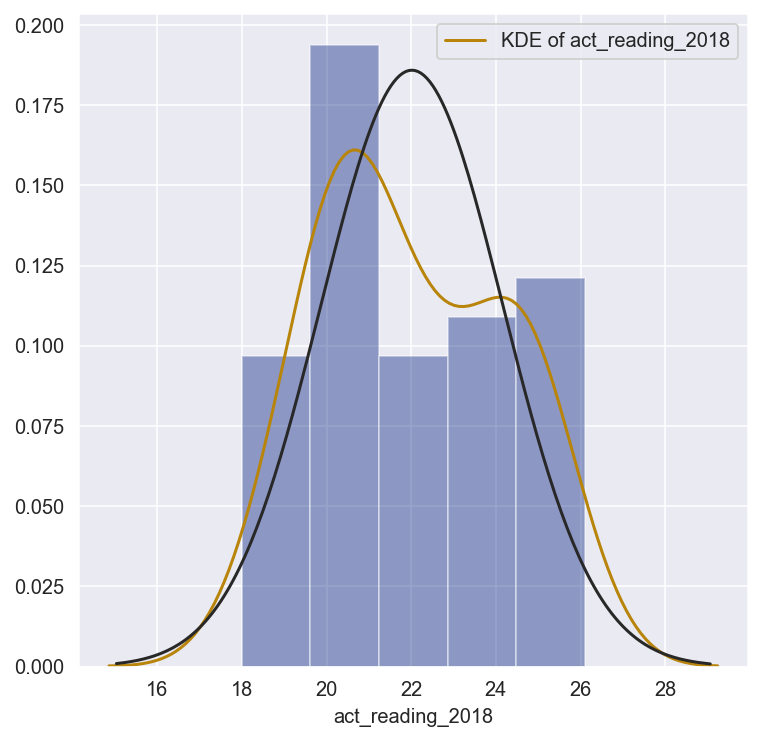

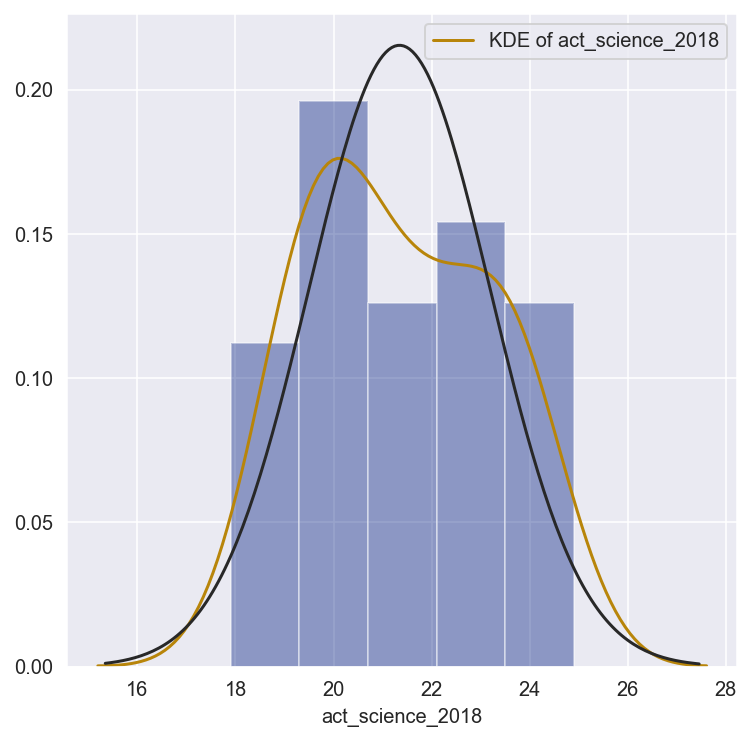

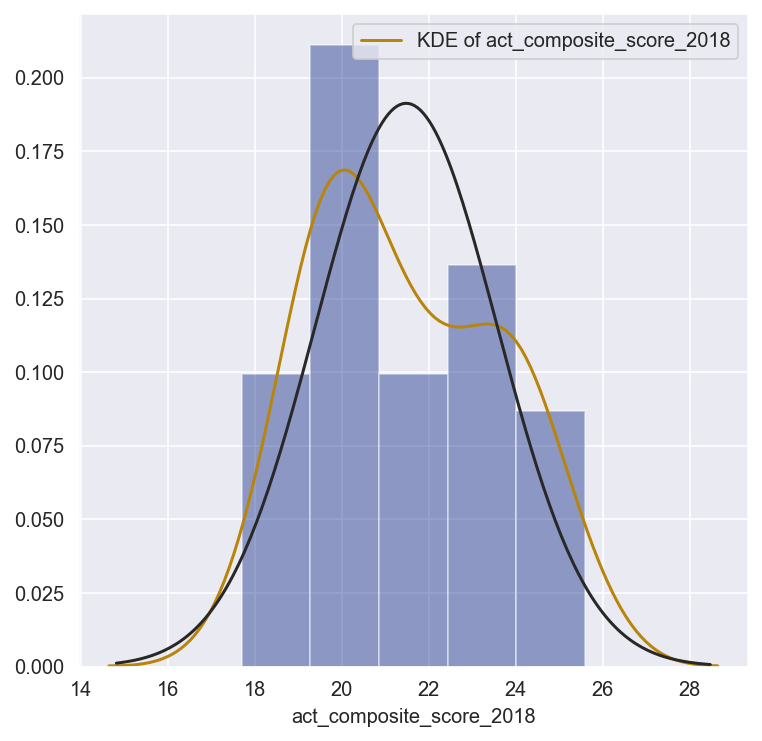

In [108]:
# plot histograms using Seaborn,
# with an accompanying Kernal Distribution Estimation (KDE) plot,
# as well as a normal-fit plotline in each histogram for comparison.

for i, col in enumerate(final_combined.columns):
    if col == 'state':
        pass
    else:
        from scipy.stats import norm
        sns.set_color_codes("dark")
        plt.figure(i)
        fig, ax = plt.subplots(figsize=(6,6))
        sns.distplot(final_combined[col],
                     fit = norm,
                     hist_kws = {"color": "b"},
                     kde_kws = {"color": "y", "label": f"KDE of {col}"},
                    )

Answer: Generally speaking, none of the variables exhibit a clear and obvious distribution typical of that of a normal distribution.

Matplotlib provides a more zoomed-in breakdown of the distribution, whereas the Seaborn plots are more zoomed-out. Some arguments of normality MAY be made for the distributions of sat_math_2017, sat_math_2017 and act_science_2017 using the zoomed-out Seaborn, but they are still weak arguments nonetheless.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

1) Math

- All of the distributions of the Math scores are positively-skewed. This causes their means to above their medians, followed by the mode.

2) Reading

- SAT Reading scores demonstrate clear bimodality (hence, clearly not normally distributed), whereas ACT Reading scores demonstrate slight-positive skewness (hence, not normally distributed as well).
- Hence, the mean will probably lie in the middle of the two peaks for the bimodal distributions. It may not be very useful to draw any statistical insights from such distributions; perhaps it might be segment the sample into "high performers" and "low performers".
- The positive skew for ACT Reading scores will result in a mean that is above the median of its distribution.

3) Rates

- Assumption of normality clearly does not hold for rates based on the observations of their distributions; there is a high count towards either tail end of their distributions. This makes sense, since most states choose to roll-out either SAT or ACT en masse, so the participation rates are skewed towards the tail ends.
- Hence, such bimodal distributions will affect estimates such as mean or standard deviation, which in turn may not be very useful for us to draw any statistical inferences. It might be better to subdivide the sample into 2 and then conduct more statistical analysis from there (in this case, perhaps divide into "ACT dominated states" vs "SAT dominated states", where the former consists of states with >50% ACT particiation rates and the latter consisting of states with >50% SAT participation rates).

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

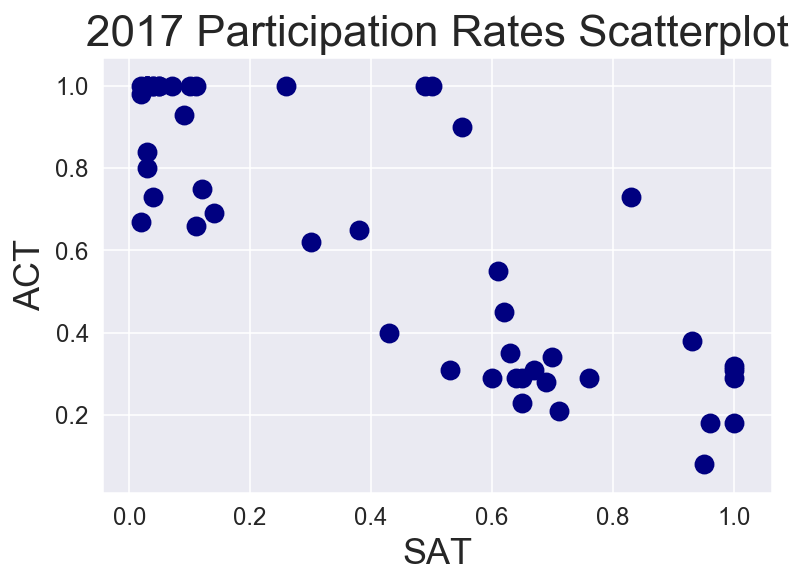

In [115]:
scatterplot('sat_participation_rate_2017', 'act_participation_rate_2017', '2017 Participation Rates Scatterplot', 'SAT', 'ACT')

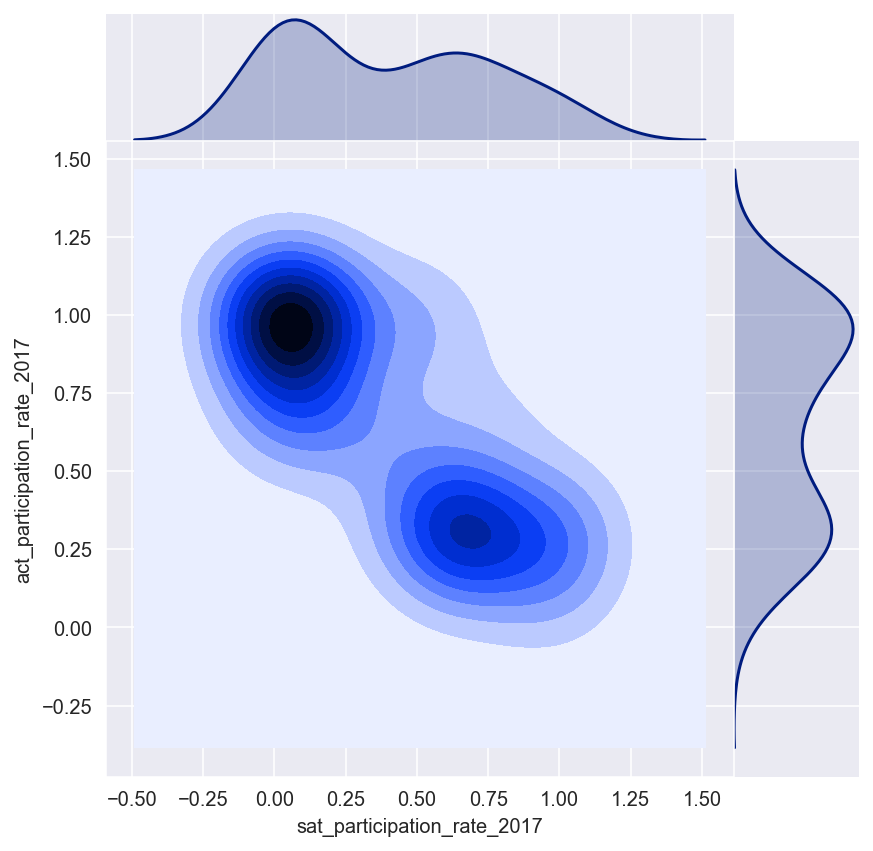

In [116]:
sns.jointplot('sat_participation_rate_2017', 'act_participation_rate_2017', data=final_combined, kind="kde", space=0, color="b")

Answer: It would still be useful to conduct statistical analysis on those 2 variables, even though we already have an idea that they are negatively correlated (most states choose either one test or the other). Besides identifying the strength of this negative correlation, we can draw a -45 degree line to identify extreme outliers. From this, it will be possible to identify these outlier states and do relevant research on them that seeks to answer the problem statement; for example: why do some of these states have high ACT participation rates and medium SAT participation rates (whereas most other states are high-ACT + low-SAT participation rates, or vice-versa)? Would these states represent potential SAT-conversion states?

Conversely, there appears to some states that have semi-low to medium participation rates in both SAT and ACT. Perhaps, these states can be classified as "swing states" that represent opportunity for higher SAT conversion and participation.

As such, it would still make sense to conduct statistical inference on these 2 variables and draw insights from them.

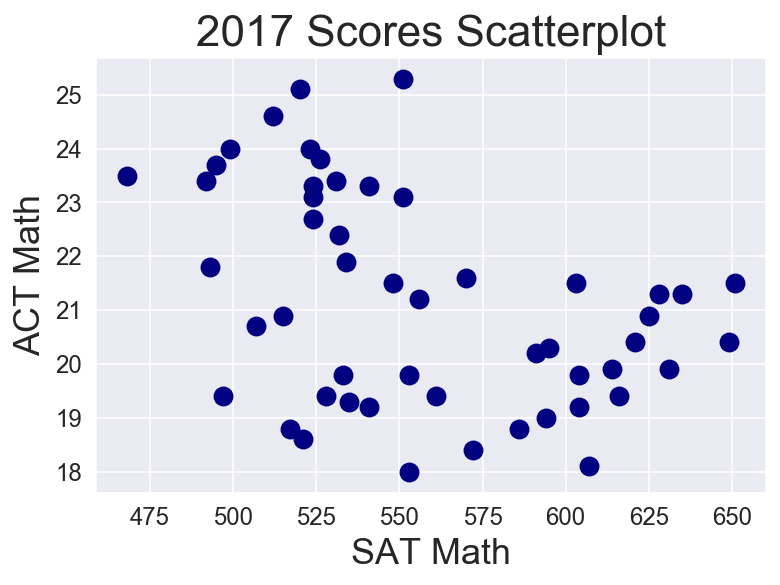

In [117]:
scatterplot('sat_math_2017', 'act_math_2017', '2017 Scores Scatterplot', 'SAT Math', 'ACT Math')

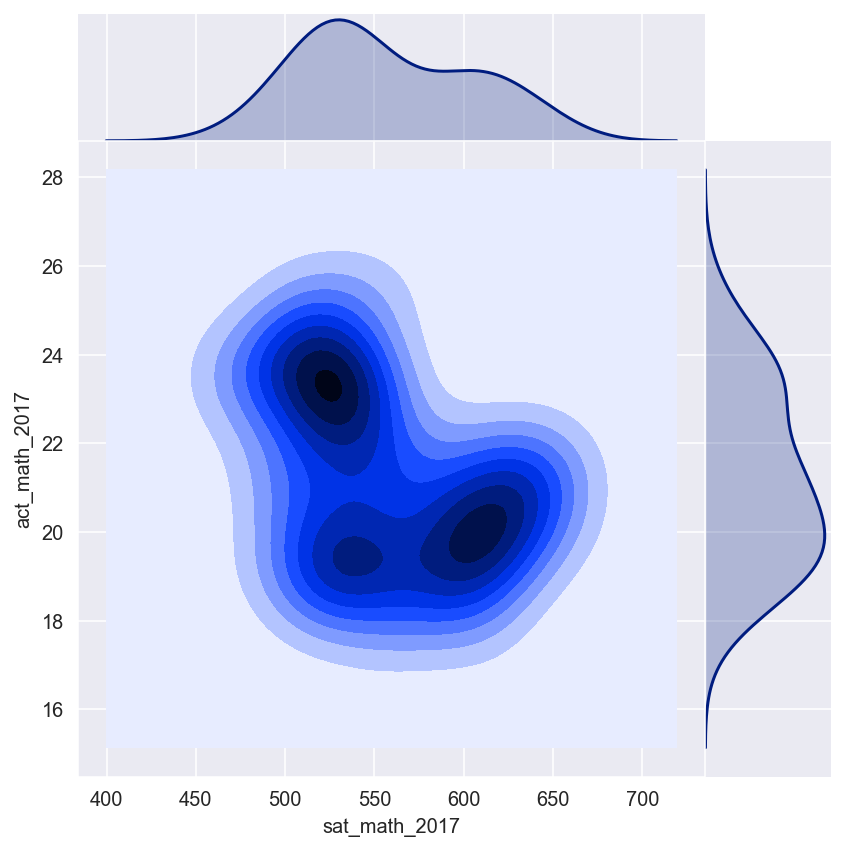

In [118]:
sns.jointplot('sat_math_2017', 'act_math_2017', data=final_combined, kind="kde", space=0, color="b")

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: There seems to be no clear relationship between the two tests' Math scores due to large and seemingly-random spread of the dataplots. If any, there may be a weakly-negative linear correlation between the 2; however the R-square value is weak and no appropriate insights may be drawn from this.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [109]:
# Code: ### Shapiro-Wilk would be nice to have to check how far assumptions of normality can be stretched

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Scatterplot 2017 vs 2018 SAT Participation Rates to identify any states that may have experienced a significant increase in SAT Participation Rates (identify the extreme outliers from the best-fit line)

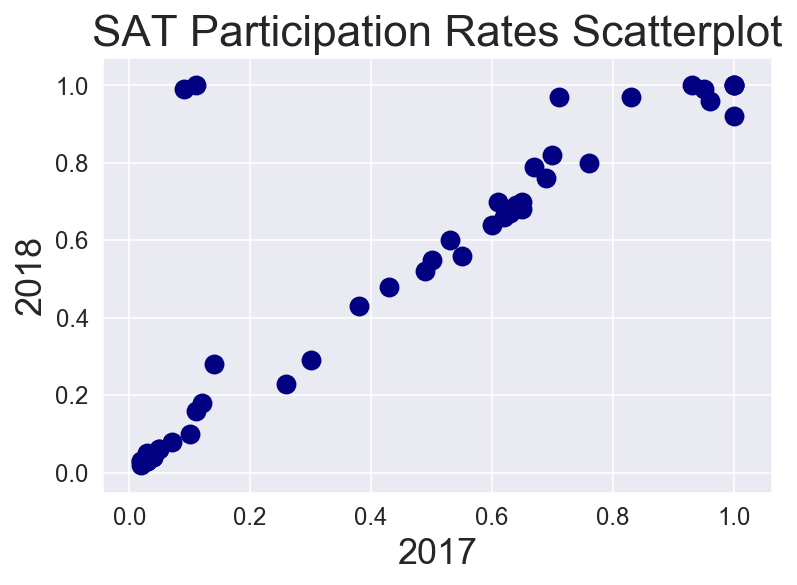

In [110]:
scatterplot('sat_participation_rate_2017', 'sat_participation_rate_2018', 'SAT Participation Rates Scatterplot', '2017', '2018')

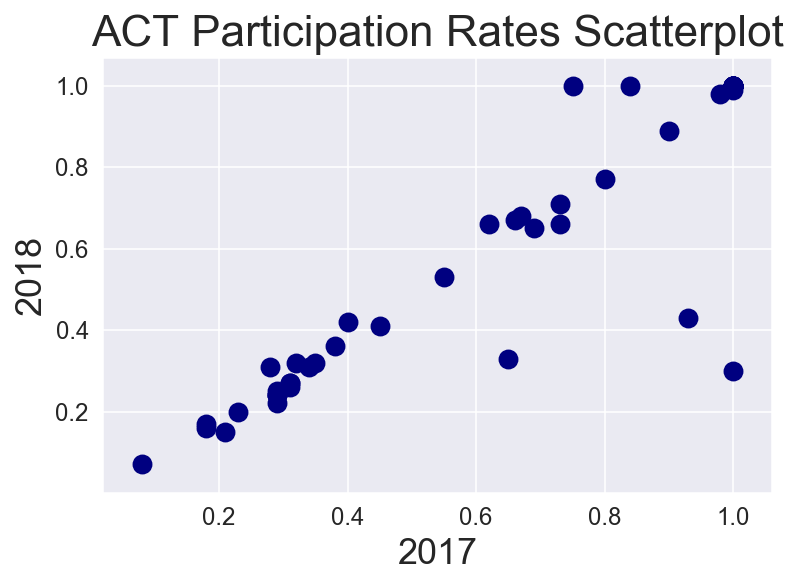

In [111]:
# Do the same for ACT and identify the outliers in terms of drastic decrease in participation rates.
scatterplot('act_participation_rate_2017', 'act_participation_rate_2018', 'ACT Participation Rates Scatterplot', '2017', '2018')

Based on the above scatterplots, 3 states of interest (outliers) have been identified: Illinois, Colarado and Alaska.

Illinois and Colardo are 2 extreme outliers that appear in both scatterplots, while Alaska is an outlier only in the ACT scatterplot.

For the former 2 states, each of them experienced a drastic increase in SAT participation rates, and the accompanying drastic decrease in ACT participation rates.

Alaska experienced a drastic increase in ACT participation rates, but not at all in SAT participation rates (in fact, Alaska experienced a marginal increase in 5 percentage points, or a 14% increase from its 2017 value).

Upon research, Illinois was found to have replaced ACT with SAT. ACT's contract with the state ended on June 30, paving the way for a competitive process for a new contract. ISBE (Illinois State Board of Education) said that "it weighed the attributes of both exams and decided the SAT was better aligned with standards for what students should know in Illinois".

As for Colorado, the state and College Board partnered to administer SAT to all high school juniors for free from 2017, resulting in the drastic uptick in SAT participation rates.

Lastly, Alaska presents an interesting case because a state law requiring the college or career readiness tests expired. This means that Alaska high school students no longer need national tests to graduate and receive their diplomas.

This would account for the drop in ACT participation rates, but one would also expect the same phenomenon to occur for SAT as well. Yet, the converse was observed for Alaska's SAT - an increase in participation rates.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

I would recommend that College Board focus on the state of Alaska in terms of spending money to increase participation rates.

### Summary table of Alaska's SAT vs ACT Participation Rates in both years:

|Year|Test|Participation Rate|Percentage Change from Previous Year|
|---|---|---|---|
|2017|SAT|**0.38**|---|
|2018|SAT|**0.43**|*+14%*|
|2017|ACT|**0.65**|---|
|2018|ACT|**0.33**|*-49%*|

As mentioned above, Alaska removed the mandatory requirement of students needing national tests to graduate and receive their diplomas, hence it was not surprising to observe the drop in ACT participation rates. However, the drop is not seen in SAT - in fact there was a 14% increase.

One thing to note here is that abolishing the requirement does NOT mean that students no longer need SAT/ACT to get into college and universities. As a matter of fact, a simple Google search on the state's own universitiy, University of Alaska Anchorage, showed that it still required SAT/ACT scores when applying for admission.

The fact that SAT's participation rate did not drop, but increased, in spite of the expiry of the Alaskan state law demonstrates its enduring relevance amongst the Alaskan students. A seperate in-depth study needs to be done to ascertain the following, but it may be plausible that the a portion of the ACT "dropouts" transited over to SAT in 2018, resulting in the slight uptick for the latter, with the other portion being students who have no intentions of going to college and simply wanting to attain their graduation and diploma.

**As such, this represents a sizable population of potential SAT "converts" that can help to boost SAT participation rates in the state. I would thus recommend College Board to focus and spend money on the state of Alaska.**

Using the examples of states of interest - Illinois and Colarado - perhaps College Board can follow Colorado's example to administer SAT for free, as right now (with the abolishment of the mandatory requirement), Alaskan students take the tests at their own expense. Additionally, as from the Illinois example, College Board ought to check on the existing, if any, SAT contract with Alaska and proceed to renew it if the contract expiry is approaching. On top of that, it will be wise to position SAT as being "better aligned with standards for what students should know" in Alaska, whether it be through a marketing/advertising mechanism, etc. In fact, Jason Glass, superintendent of the Eagle County school district in Colorado, opined that one factor that may have swayed Colorado was that "the SAT has a reputation for being more reason-based and focused on critical thinking, while the ACT has a reputation for being more of a fact-recall test". This should be taken into consideration for the approach to Alaska.